# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

**Team 4** confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

    

In this section we will import and discuss, the libraries that will be used throughout the analysis and modelling. 

---

In [92]:
# Libraries for data loading, data manipulation and data visulisation
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns

# Libraries for data preparation and model building
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.correlation import plot_corr
from scipy import stats
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


 In this section we will load the data from the `df_train` file into a DataFrame. 



In [93]:
df = pd.read_csv("df_train.csv")
pd.set_option('display.max_columns', None)
df.head(5)

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0                0.0           1.000000                 0.0       223.333333   
1                0.0           1.000000                 0.0       221.000000   
2                0.0           1.000000                 0.0       214.333333   
3                0.0           1.000000                 0.0       199.666667   
4                2.0           0.333333                 0.0       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   
3              2.333333          273.000000                0.0   
4              4.333333          260.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  \
0            3.333333                0.0             sp25              0.0   
1            3.333333                0.0             sp25              0.0   
2            2.666667                0.0             sp25              0.0   
3            4.000000                0.0             sp25              0.0   
4            3.000000                0.0             sp25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0             0.0         1036.333333              0.0             0.0   
1             0.0         1037.333333              0.0             0.0   
2             0.0         1038.000000              0.0             0.0   
3             0.0         1037.000000              0.0             0.0   
4             0.0         1035.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0               0.0              800.0   
1                0.0               0.0              800.0   
2                0.0               0.0              800.0   
3                0.0               0.0              800.0   
4                0.0               0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   
2                 800.0      1036.000000               800.0   
3                 800.0      1036.000000               800.0   
4                 800.0      1035.333333               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   
2        1005.333333        278.792000       974.000000         278.008667   
3        1009.000000        285.394000       994.666667         284.899552   
4                NaN        285.513719      1035.333333         283.015115   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0   

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


    
In this section, we will perform an in-depth analysis of all the variables in the DataFrame.

We will look at:

- Categorical and numerical features
- features with null values
- features that have negative values
- Graphical and non graphical representaion of outliers
- Interactions of the features
- Distributions of the features
- features with 0.0 values

### Data frame anaylsis

We will look at the method df.infor. This will provide us with information about the data types of the variables, the number of varibles and the non-null count for each variable.

In [84]:
# look at data statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

Above we observe that there are features that contain non-numerical values. These are __*Time*, *Valencia_wind_deg*__ and __*Seville_pressure*__


We will also look at the function df.isnull().sum(). This will give us information about which variables have null values.

In [85]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

Above we can see that __*Valencia_pressure*__ has 2068 Null values and we are going to fill the missing values using the "fillna" fuction. We also are going to remove the *__"Unnamed: 0"__* feature because it is redundant (We do not need it). 

We can observe the description of the dataset by using the method df.describe().

In [86]:
df.describe()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count  8763.000000        8763.000000     8763.000000          8763.000000   
mean   4381.000000           2.425729        0.135753             2.586272   
std    2529.804538           1.850371        0.374901             2.411190   
min       0.000000           0.000000        0.000000             0.000000   
25%    2190.500000           1.000000        0.000000             1.000000   
50%    4381.000000           2.000000        0.000000             1.666667   
75%    6571.500000           3.333333        0.100000             3.666667   
max    8762.000000          13.000000        3.000000            52.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       8763.000000      8763.000000        8763.000000   
mean          62.658793        57.414717          43.469132   
std           22.621226        24.335396          32.551044   
min            8.333333         6.333333           0.000000   
25%           44.333333        36.333333          10.000000   
50%           65.666667        58.000000          45.000000   
75%           82.000000        78.666667          75.000000   
max          100.000000       100.000000         100.000000   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
count        8763.000000         8763.000000      8763.000000   
mean            1.850356           13.714748       158.957511   
std             1.695888           24.272482       102.056299   
min             0.000000            0.000000         0.000000   
25%             0.666667            0.000000        73.333333   
50%             1.000000            0.000000       147.000000   
75%             2.666667           20.000000       234.000000   
max            12.666667           97.333333       359.333333   

       Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
count           8763.000000         8763.000000        8763.000000   
mean               2.870497          190.544848          19.473392   
std                1.792197           89.077337          28.053660   
min                0.000000            0.000000           0.000000   
25%                1.666667          118.166667           0.000000   
50%                2.666667          200.000000           0.000000   
75%                4.000000          260.000000          33.333333   
max               12.666667          360.000000         100.000000   

       Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  Bilbao_snow_3h  \
count         8763.000000        8763.000000      8763.000000     8763.000000   
mean             2.425045           0.128906         0.039439        0.031912   
std              1.672895           0.634730         0.175857        0.557264   
min              0.000000           0.000000         0.000000        0.000000   
25%              1.000000           0.000000         0.000000        0.000000   
50%              2.000000           0.000000         0.000000        0.000000   
75%              3.333333           0.000000         0.000000        0.000000   
max             11.666667          12.000000         3.000000       21.300000   

       Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  \
count        8.763000e+03      8763.000000     8763.000000        8763.000000   
mean         1.377965e+03         0.000243        0.037818           0.000439   
std          1.407314e+04         0.003660        0.152639           0.003994   
min          6.706667e+02         0.000000        0.000000           0.000000   
25%          1.014000e+03         0.000000        0.000000           0.000000   
50%          1.018000e+03         0.000000        0.000000           0.000000   
75%          1.022000e+03         0.000000        0.000000           0.000000   
max          1.001411e+06         0.093333        3.000000           0.093000   

       Valencia_snow_3h  Madrid_weather_id  Barcelona_weathe

We obsserve  that __*load_shortfall_3h*__ has negative values the lowest being -6618.

We believe that the Load Short Fall is the difference between the power generation through fossil fuel and renewable energy sources. The negative values of the Load Short Fall could mean that the fossil fuel is doing better than renewable energy in generating electricity and positive values could mean that renewable energy is doing well compared to fossil fuel.


Standard deviation a measure of average distance from the mean. It is used to measure of how dispersed the data is in relation to the mean.We can use coefficient of variation (CV) to measure how spread out values are in a dataset relative to the mean. The CV is a ratio between the standard deviation and the mean.The higher the CV, the higher the standard deviation relative to the mean. In general, a CV value greater than 1 is often considered high.

In [87]:
CV=abs(df.std(axis = 0))/abs(df.mean(axis = 0))


print(CV)

Unnamed: 0               0.577449
Madrid_wind_speed        0.762810
Bilbao_rain_1h           2.761647
Valencia_wind_speed      0.932303
Seville_humidity         0.361022
Madrid_humidity          0.423853
Bilbao_clouds_all        0.748831
Bilbao_wind_speed        0.916520
Seville_clouds_all       1.769809
Bilbao_wind_deg          0.642035
Barcelona_wind_speed     0.624351
Barcelona_wind_deg       0.467488
Madrid_clouds_all        1.440615
Seville_wind_speed       0.689841
Barcelona_rain_1h        4.923986
Seville_rain_1h          4.459006
Bilbao_snow_3h          17.462507
Barcelona_pressure      10.212992
Seville_rain_3h         15.088844
Madrid_rain_1h           4.036128
Barcelona_rain_3h        9.088357
Valencia_snow_3h        57.766503
Madrid_weather_id        0.099949
Barcelona_weather_id     0.115071
Bilbao_pressure          0.009871
Seville_weather_id       0.092867
Valencia_pressure        0.009393
Seville_temp_max         0.029837
Madrid_pressure          0.021972
Valencia_temp_

<ipython-input-87-219a6e38d00d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  CV=abs(df.std(axis = 0))/abs(df.mean(axis = 0))


From the calculation of the CV. We observe that the following variables have high CVs. This means that these variables have a greater level of dispersion around the mean

-  Bilbao_rain_1h           
-  Seville_clouds_all       
-  Madrid_clouds_all        
-  Barcelona_rain_1h
-  Seville_rain_1h
-  Bilbao_snow_3h
-  Barcelona_pressure
-  Seville_rain_3h
-  Valencia_snow_3h

The highest CV is from the feature Valencia_snow_3h with a CV of 58. Bilbao_snow_3h has the second highest CV with 17.

### Distribution and Skewness

Skewed data means that there is a a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution. If our data is too skewed then our model may not work because the tail region may act as outlier of the statistical model. It will be necessary to transform the skewed data to a close enough normal distribution for our moodel to work.

If the skewness is between -0.5 and 0.5, the data is fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data is moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

In [88]:
#skewness
df.skew()

<ipython-input-88-ca90bfe58b72>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

The following variables have skewness values that are great and less than 1. The distributions of the following these variables are highly skewed.

- Madrid_wind_speed      
- Bilbao_rain_1h           
- Valencia_wind_speed      
- Bilbao_wind_speed        
- Seville_clouds_all       
- Barcelona_wind_speed     
- Madrid_clouds_all        
- Seville_wind_speed       
- Barcelona_rain_1h        
- Seville_rain_1h          
- Bilbao_snow_3h          
- Barcelona_pressure      
- Seville_rain_3h         
- Madrid_rain_1h           
- Barcelona_rain_3h       
- Valencia_snow_3h        
- Madrid_weather_id       
- Barcelona_weather_id    
- Seville_weather_id      
- Valencia_pressure       
- Madrid_pressure         
- Bilbao_weather_id   

*Histogram plots*


We can observe the distributions of the variables by looking at their respective histograms and barplots. We can detect the skewness of the variables with these plots.

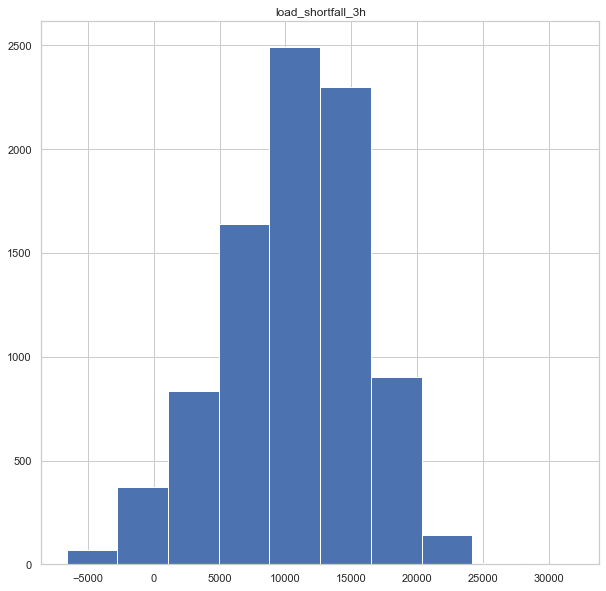

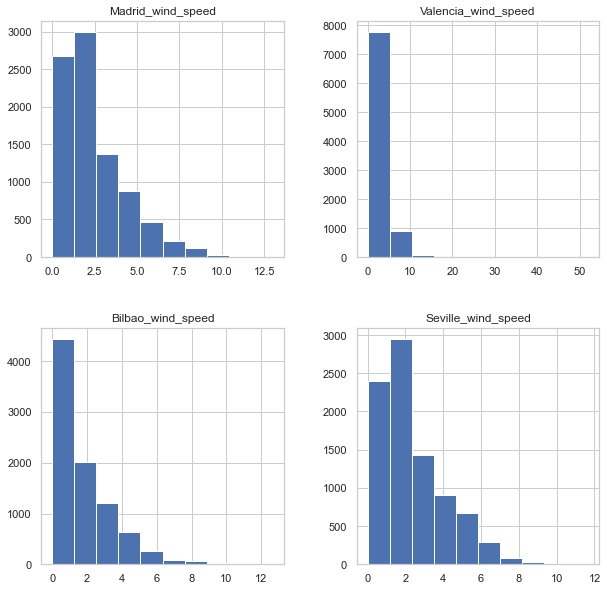

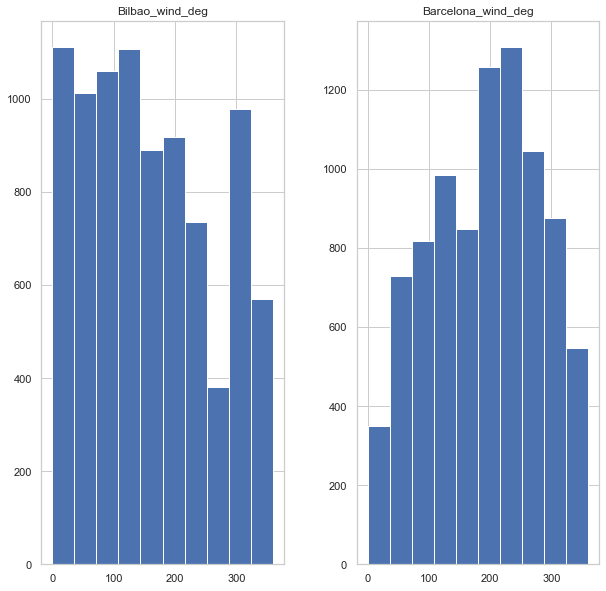

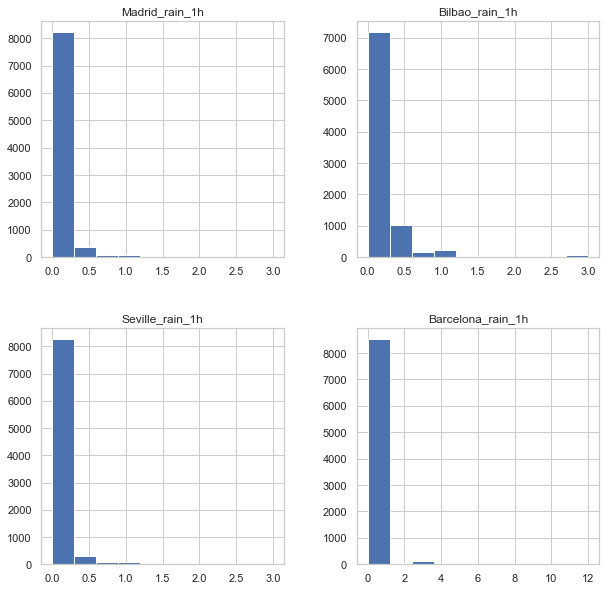

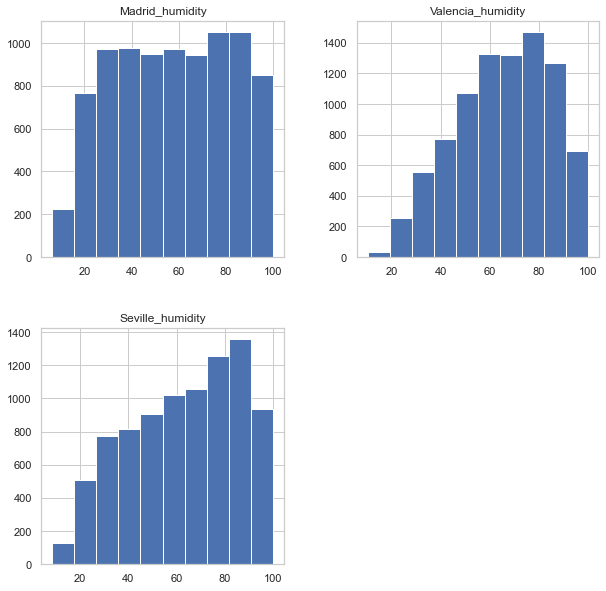

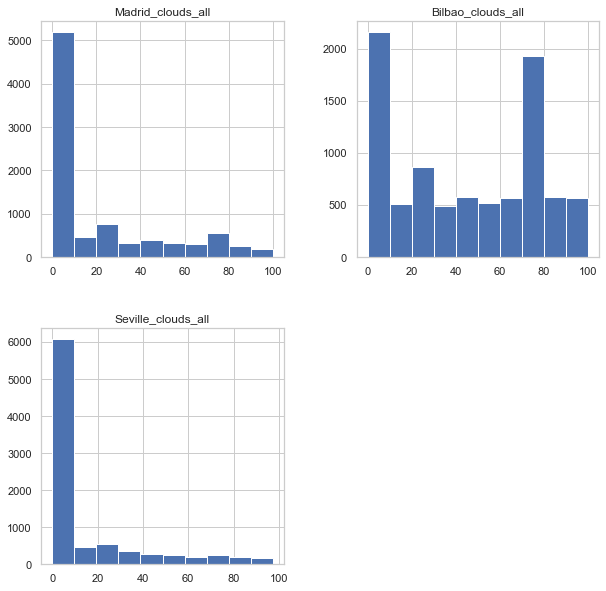

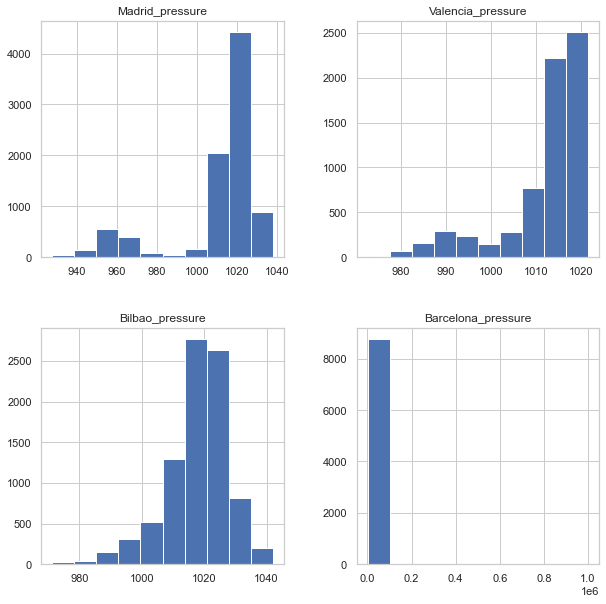

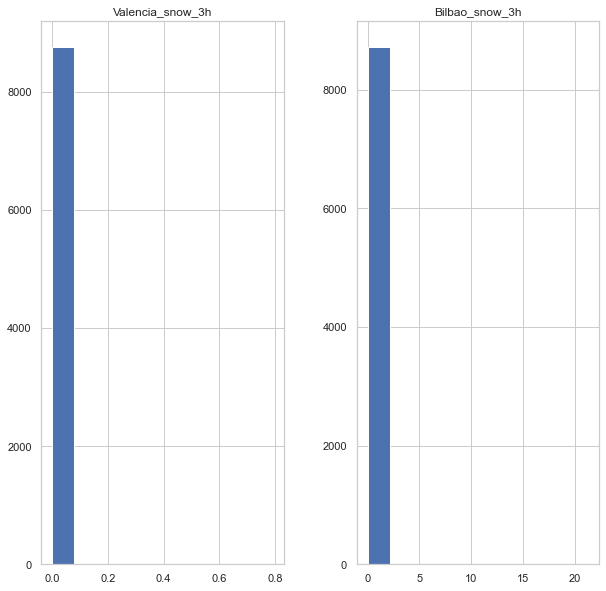

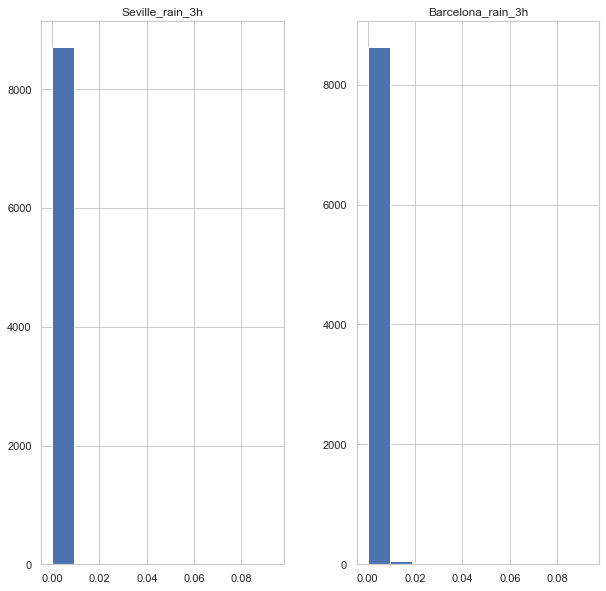

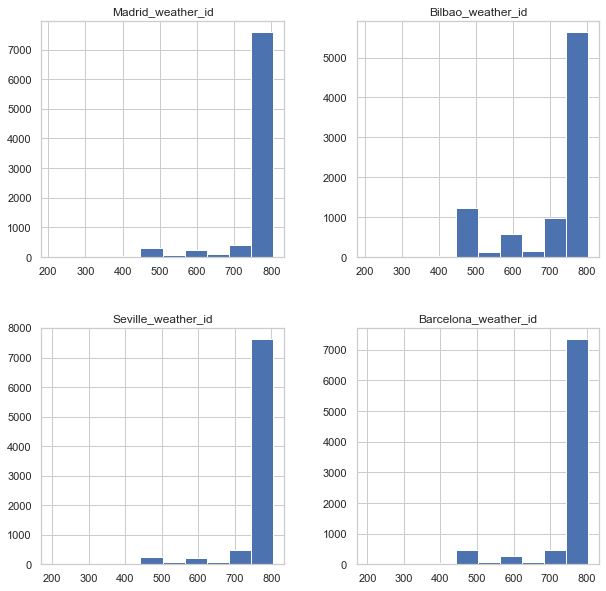

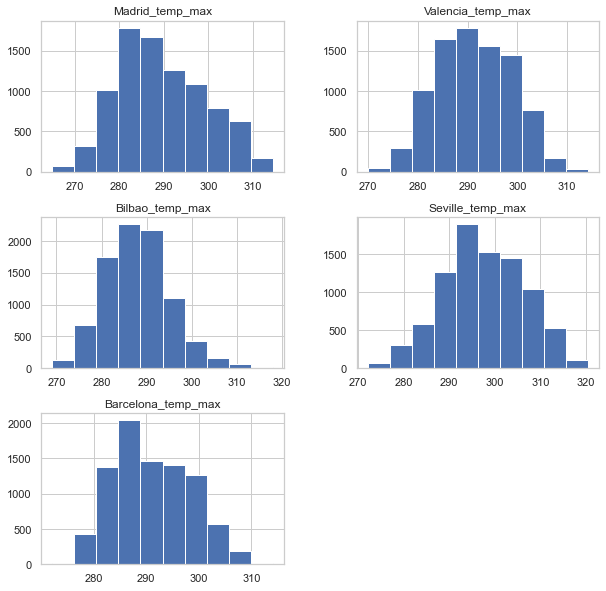

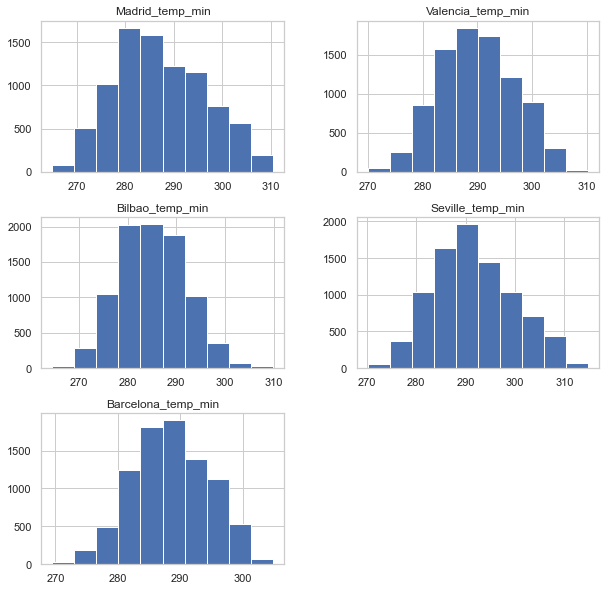

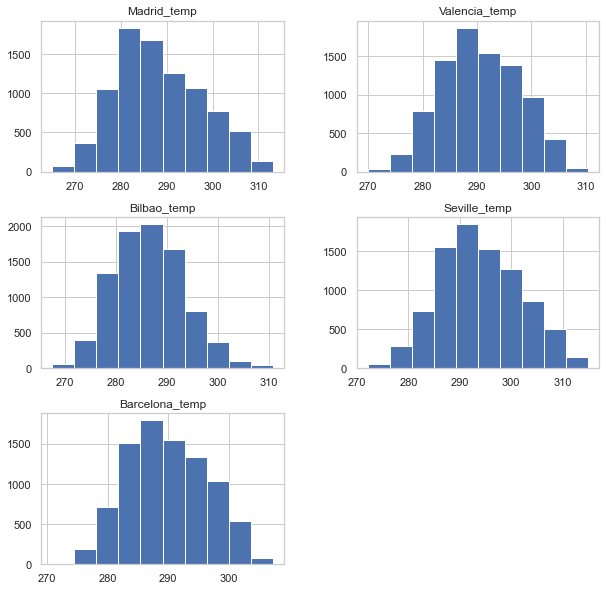

In [89]:
#histograms for Numerical data

#dependent variable
features_load_shortfall_3h = ['load_shortfall_3h']  # create a histogram for the y variable 
df[features_load_shortfall_3h].hist(figsize=(10,10), bins=10);

# wind speed
features_wind_speed = ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_wind_speed'] # create a list of all numerical features(wind_speed)
df[features_wind_speed].hist(figsize=(10,10), bins=10);
    
                             
# wind degrees
features_wind_speed = ['Bilbao_wind_deg', 'Barcelona_wind_deg'] # create a list of all numerical features(wind_speed)
df[features_wind_speed].hist(figsize=(10,10), bins=10);                             
                      
                             
#rain_1hr
features_rain_1h = ['Madrid_rain_1h', 'Bilbao_rain_1h','Seville_rain_1h','Barcelona_rain_1h'] # create a list of all numerical features (rain_1h)
df[features_rain_1h].hist(figsize=(10,10), bins=10);   
                             
                          
#humidity
features_humidity = ['Madrid_humidity', 'Valencia_humidity', 'Seville_humidity'] # create a list of all numerical features (humidity)
df[features_humidity].hist(figsize=(10,10));
                                                         

#clouds
features_clouds_all = ['Madrid_clouds_all', 'Bilbao_clouds_all', 'Seville_clouds_all'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));
                             
                             
#pressure
features_clouds_all = ['Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure', 'Seville_pressure', 'Barcelona_pressure'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));                             
                           
#snow_3h
features_clouds_all = ['Valencia_snow_3h', 'Bilbao_snow_3h'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));

#rain_3h
features_clouds_all = ['Seville_rain_3h', 'Barcelona_rain_3h'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));
                             
                             
#weather_id
features_clouds_all = ['Madrid_weather_id', 'Bilbao_weather_id', 'Seville_weather_id', 'Barcelona_weather_id'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));                             
                           
#temp_max                             
features_temp_max = ['Madrid_temp_max', 'Valencia_temp_max', 'Bilbao_temp_max', 'Seville_temp_max', 'Barcelona_temp_max'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);

#temp_max                             
features_temp_max = ['Madrid_temp_min', 'Valencia_temp_min', 'Bilbao_temp_min', 'Seville_temp_min', 'Barcelona_temp_min'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);                          
                     
#temp                            
features_temp_max = ['Madrid_temp', 'Valencia_temp', 'Bilbao_temp', 'Seville_temp', 'Barcelona_temp'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);
                             

We can observe from the graphs above that the following variables have  0.0 values (skewed to the left)
- Barcelona_pressure
- Valencia_snow_3h
- Bilbao_snow_3h
- Seville_rain_3h

The following variables have alot of 0.0 value (skewed to the left)
- Seville_rain_1h','Barcelona_rain_1h
- Seville_rain_1h','Barcelona_rain_1h

<AxesSubplot:xlabel='Seville_pressure', ylabel='count'>

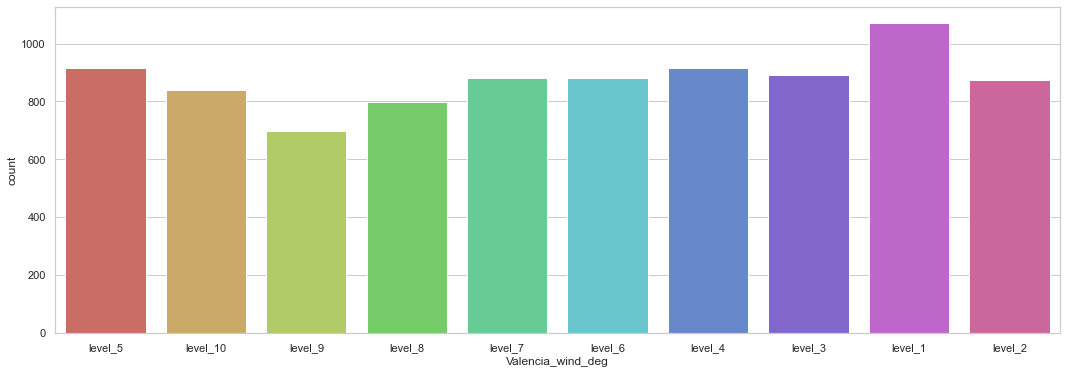

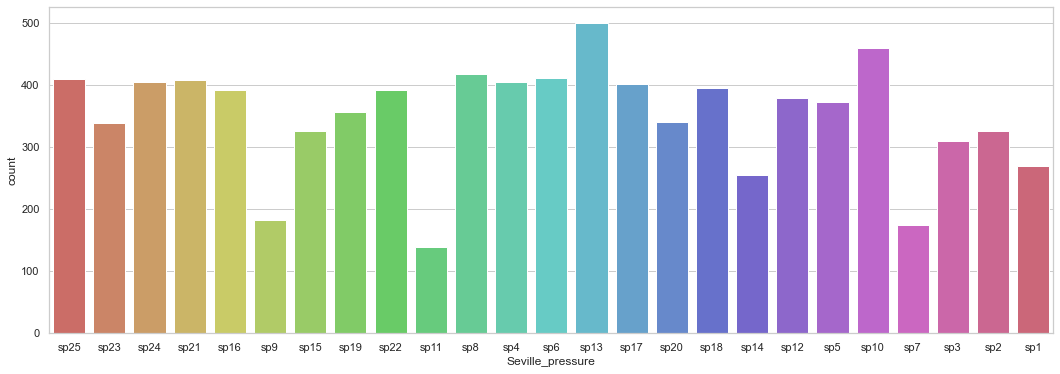

In [90]:
#categorical bar plots

#wind_deg
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Valencia_wind_deg', data = df, palette="hls")

#Seville_pressure
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Seville_pressure', data = df, palette="hls")

From observation it seem that the distributions of 'Valencia_wind_deg'(categorical) is similar to the distributions of the numerical variables 'Bilbao_wind_deg' and 'Barcelona_wind_deg'.

The distribution of 'Seville_pressure (categorical) is also similar to the other numerical pressure variables 'Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure' and 'Seville_pressure'

We could possibly use the numerical variables to estimate the categorical variables.

### Outliers

Kurtosis can be used to detect outliers. We expect a kurtosis value to be between [3,-3]. If the number is greater than 3 it means there is a huge number of outliers.


In [91]:
#kurtosis
df.kurtosis()

<ipython-input-91-c1a853d8d8fd>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

From the ananlysis above we can observe that the following variables have a kurtosis value larger than 3.

- Bilbao_rain_1h            
- Valencia_wind_speed       
- Bilbao_wind_speed          
- Barcelona_rain_1h        
- Seville_rain_1h           
- Bilbao_snow_3h           
- Barcelona_pressure      
- Seville_rain_3h          
- Madrid_rain_1h            
- Barcelona_rain_3h        
- Valencia_snow_3h        
- Madrid_weather_id          
- Barcelona_weather_id       
- Seville_weather_id        
- Valencia_pressure          

We can use the boxplot and scatter plot to graphically see if we have and outliers in our data.If there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes.

The black dots in the graphs below represent the outliers for each of the variables.

<AxesSubplot:>

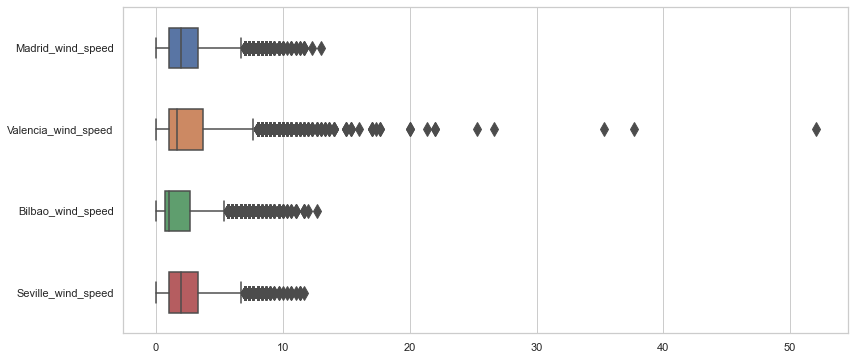

In [92]:
#wind speed
selected_columns = df[ [ 'Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_wind_speed' ] ]
df_wind_speed = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_wind_speed,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

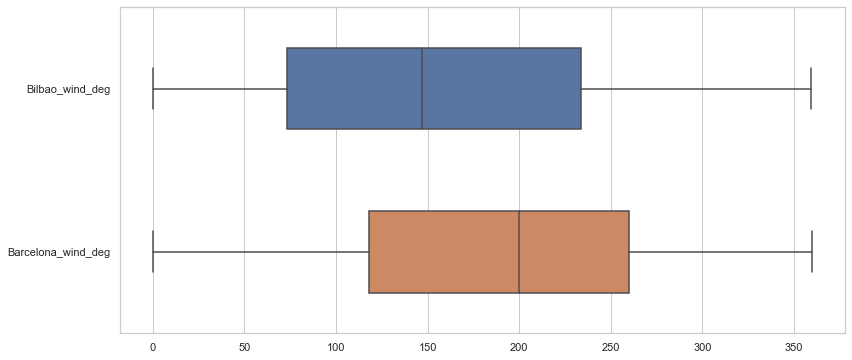

In [93]:
#wind speed
selected_columns = df[ [ 'Bilbao_wind_deg', 'Barcelona_wind_deg'] ]
df_wind_deg = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_wind_deg,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

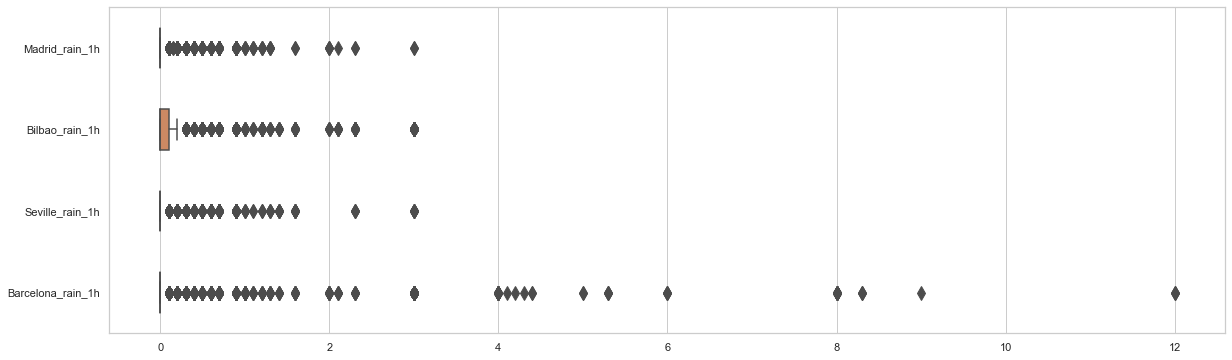

In [94]:
#rain_1h
selected_columns = df[ ['Madrid_rain_1h', 'Bilbao_rain_1h','Seville_rain_1h','Barcelona_rain_1h'] ]
df_rain_1h = selected_columns.copy() 



sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(20,6))
sns.boxplot(data=df_rain_1h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

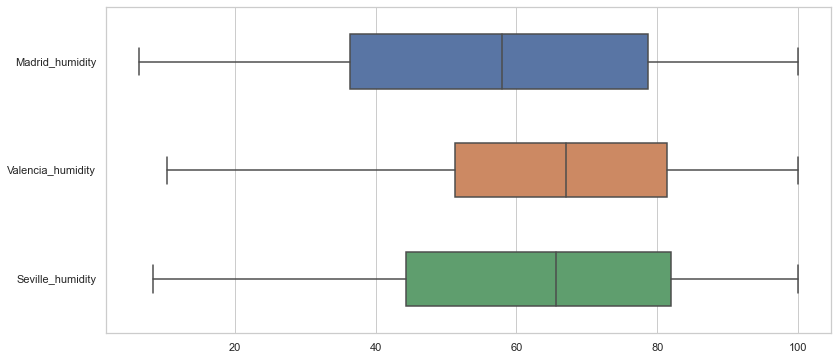

In [95]:
#humidity
selected_columns = df[ ['Madrid_humidity', 'Valencia_humidity', 'Seville_humidity'] ]
df_humidity = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_humidity,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

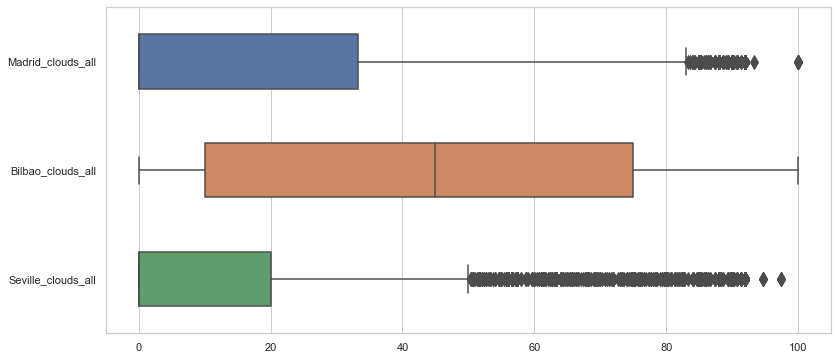

In [96]:
#clouds_all
selected_columns = df[ ['Madrid_clouds_all', 'Bilbao_clouds_all', 'Seville_clouds_all'] ]
df_clouds_all = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_clouds_all,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

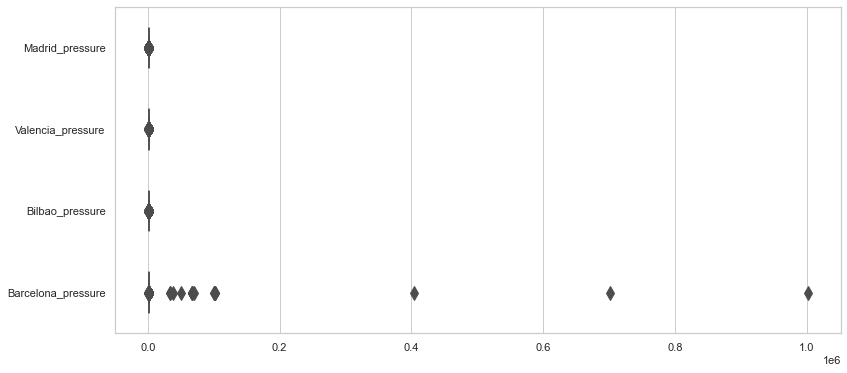

In [97]:
#pressure
selected_columns = df[ ['Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure', 'Seville_pressure', 'Barcelona_pressure'] ]
df_pressure = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_pressure,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

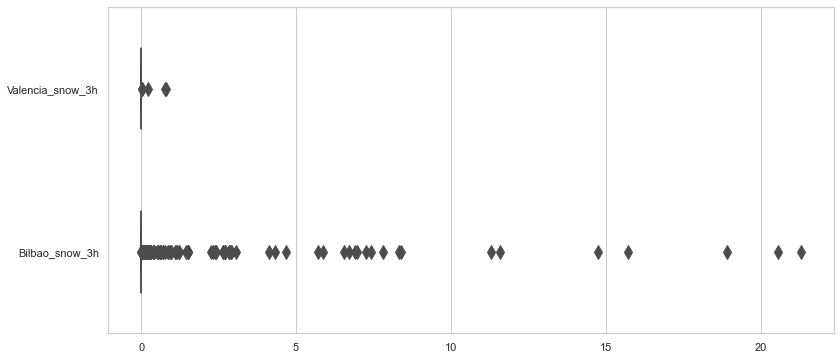

In [98]:
#snow_3h
selected_columns = df[ ['Valencia_snow_3h', 'Bilbao_snow_3h'] ]
df_snow_3h = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_snow_3h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

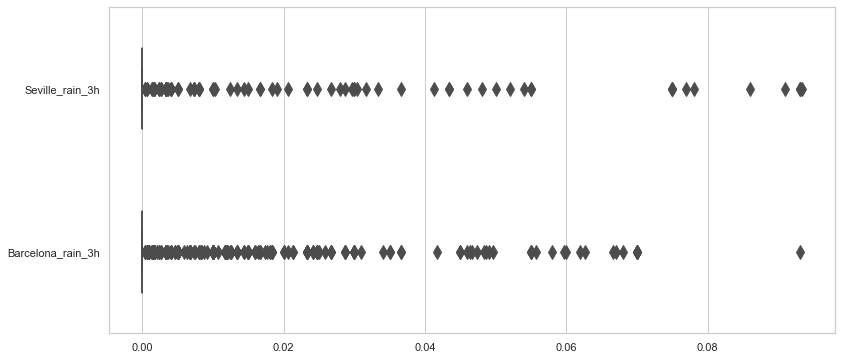

In [99]:
#rain_3h
selected_columns = df[ ['Seville_rain_3h', 'Barcelona_rain_3h' ]]
df_rain_3h = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_rain_3h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

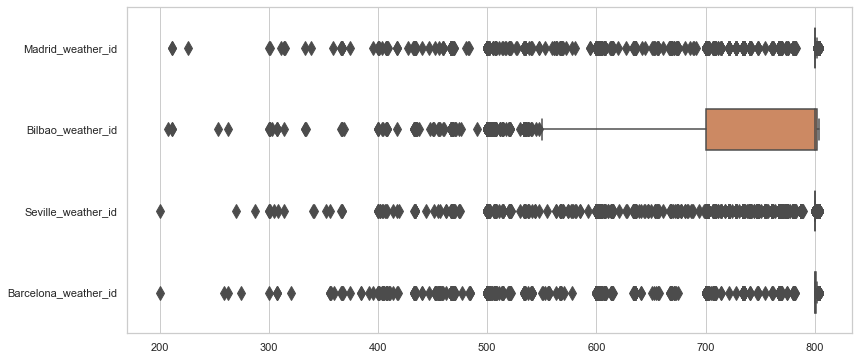

In [100]:
#weather_id
selected_columns = df[ ['Madrid_weather_id', 'Bilbao_weather_id', 'Seville_weather_id', 'Barcelona_weather_id' ]]
df_weather_id = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_weather_id,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

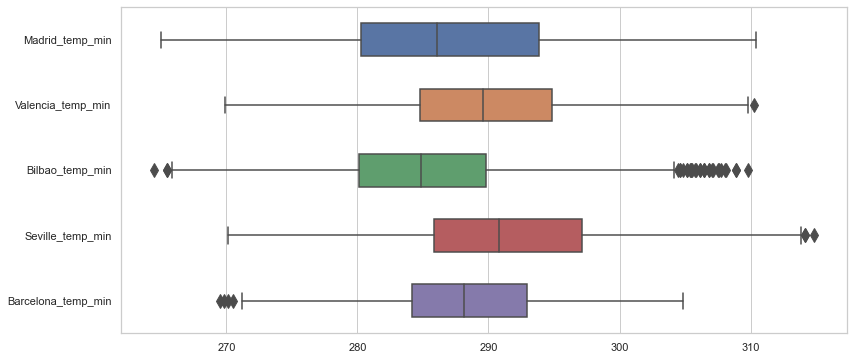

In [101]:
#temp_min
selected_columns = df[ ['Madrid_temp_min', 'Valencia_temp_min', 'Bilbao_temp_min', 'Seville_temp_min', 'Barcelona_temp_min']]
df_temp_min = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_temp_min,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

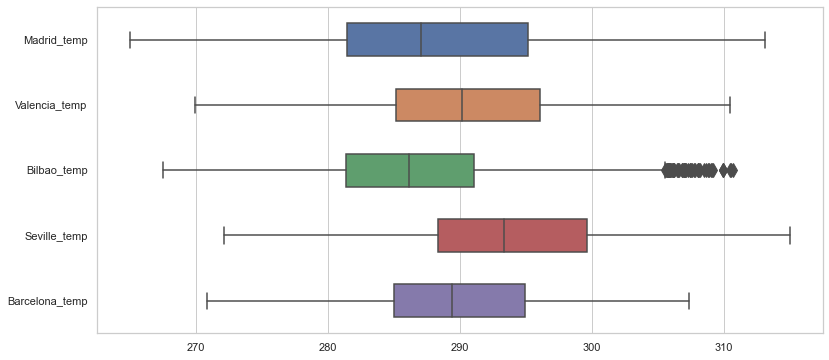

In [102]:
#temp
selected_columns = df[ ['Madrid_temp', 'Valencia_temp', 'Bilbao_temp', 'Seville_temp', 'Barcelona_temp']]
df_temp = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_temp,orient="h",width=0.5, fliersize=10)

#### Correlation and Multicollinearity

Below we plot relevant feature interactions

C:\Users\u1121\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:xlabel='Barcelona_temp', ylabel='load_shortfall_3h'>

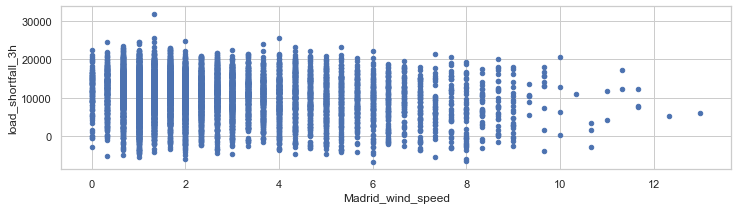

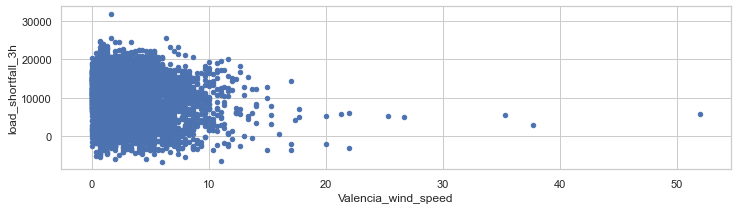

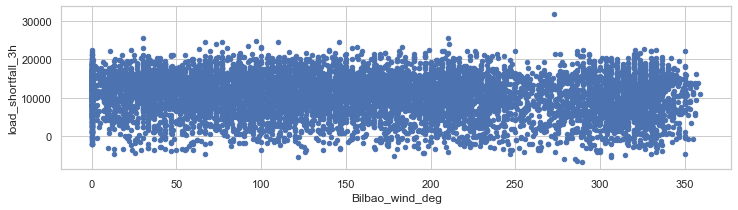

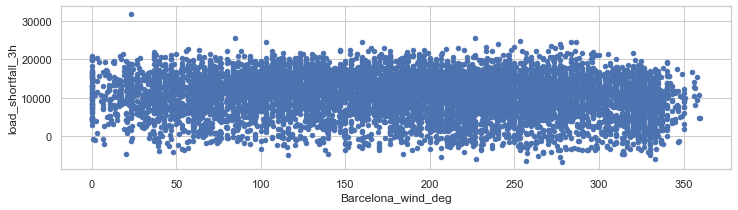

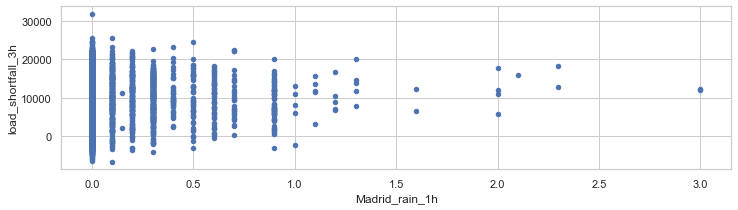

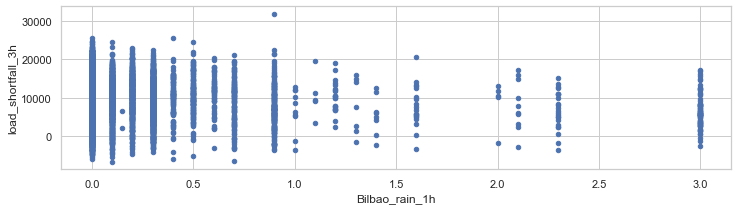

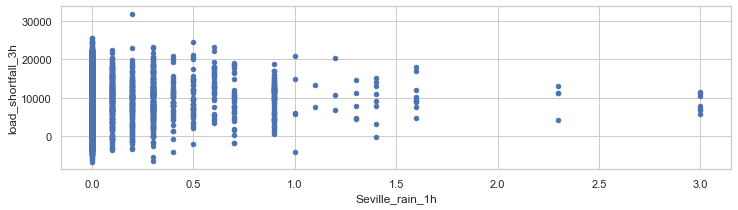

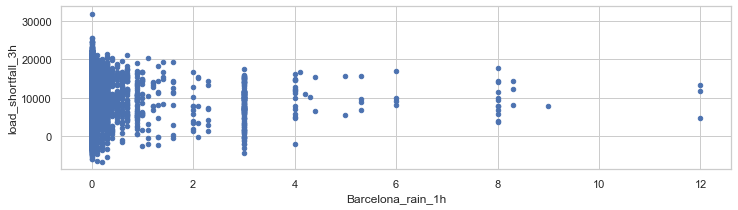

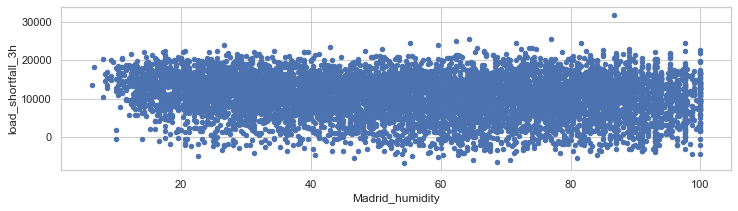

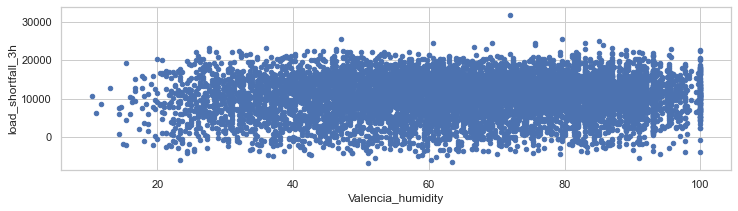

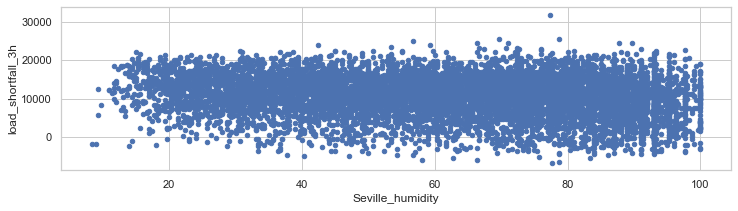

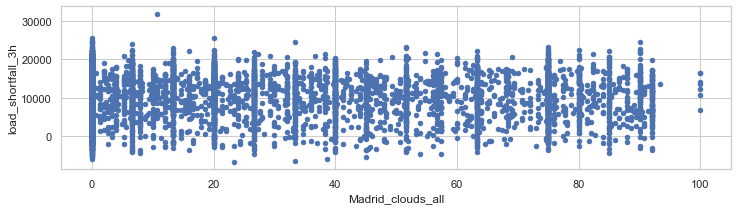

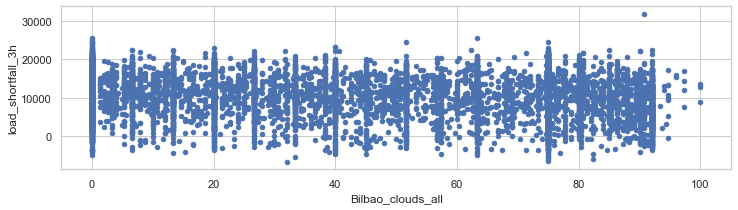

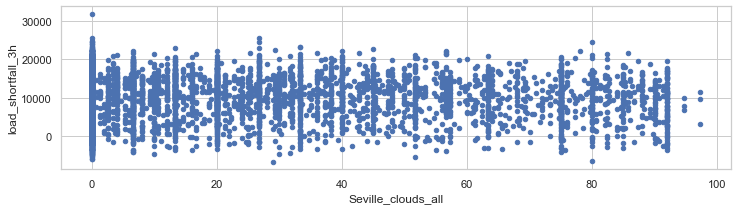

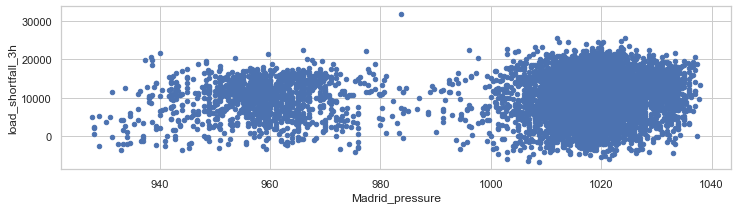

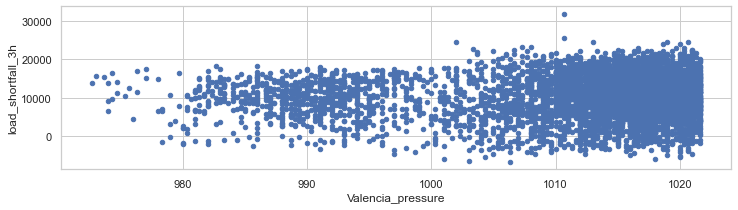

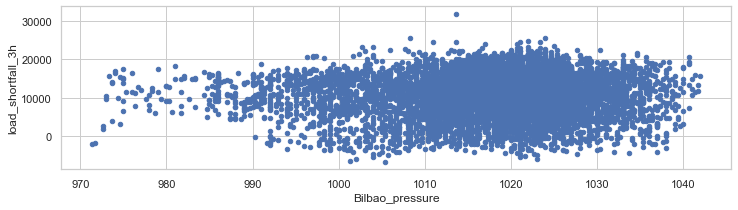

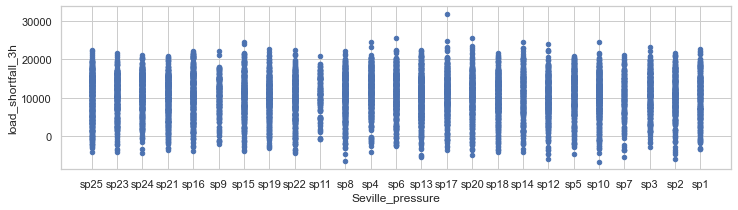

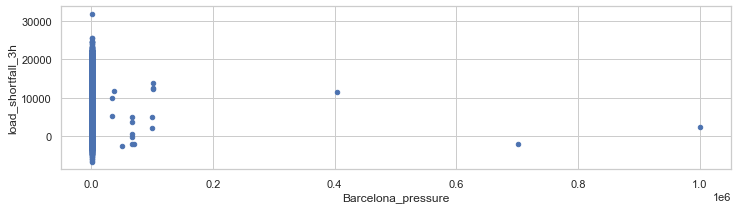

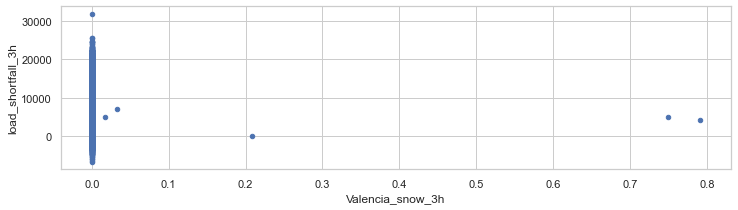

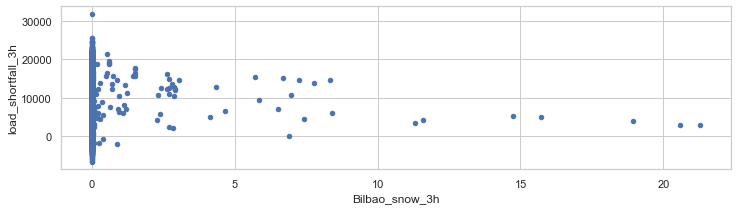

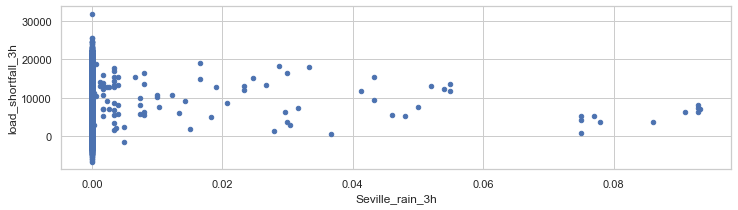

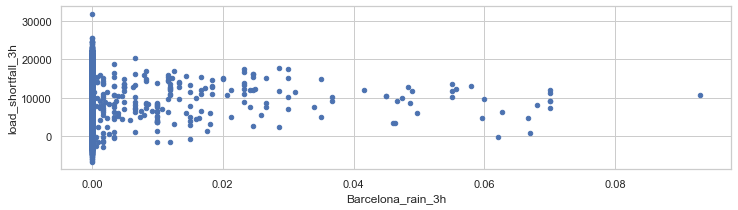

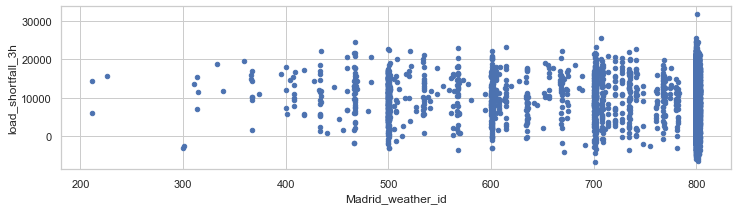

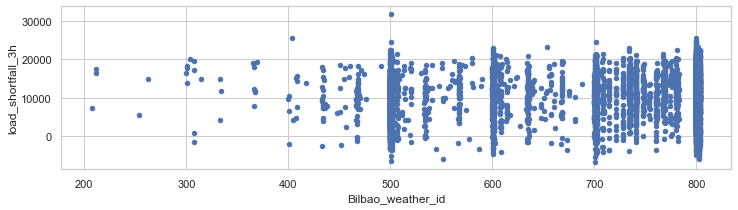

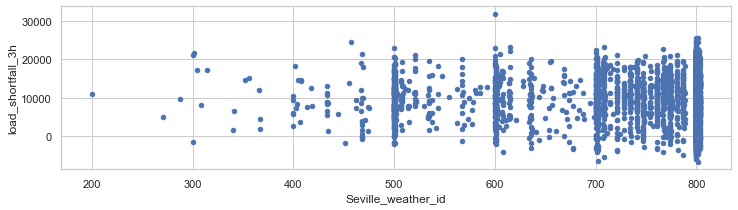

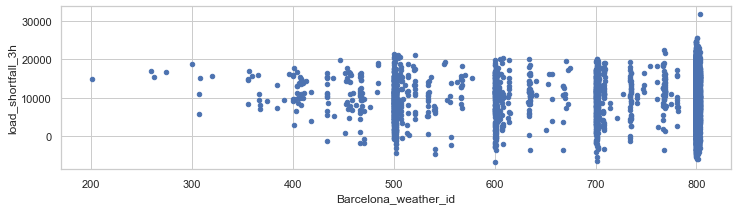

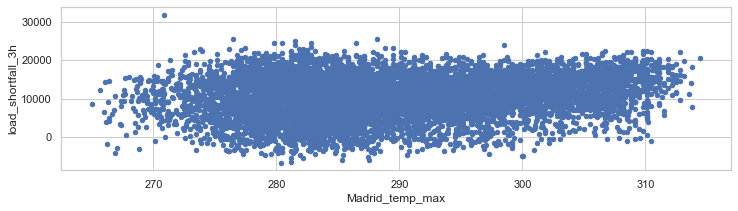

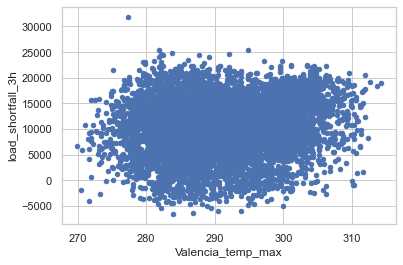

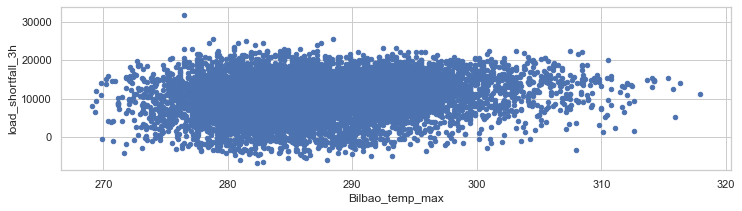

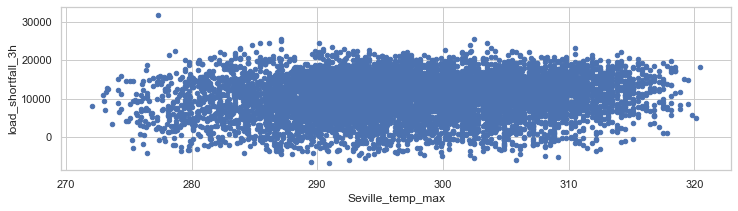

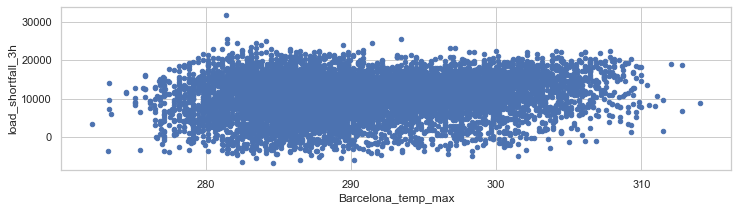

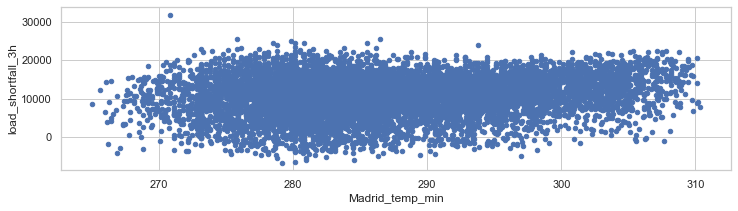

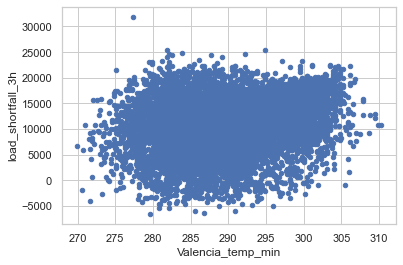

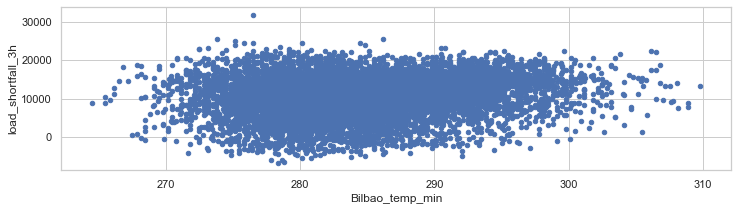

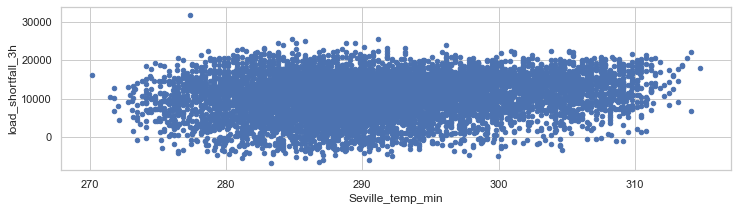

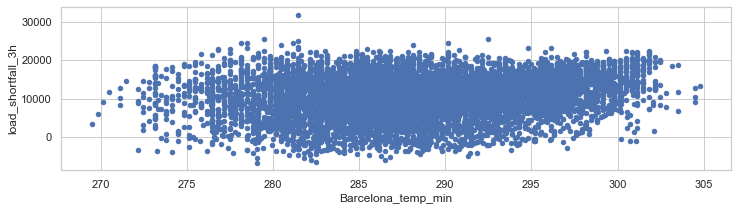

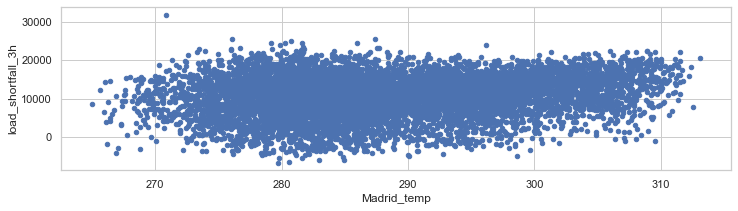

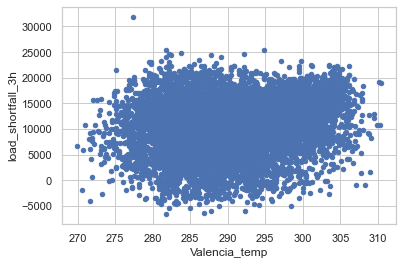

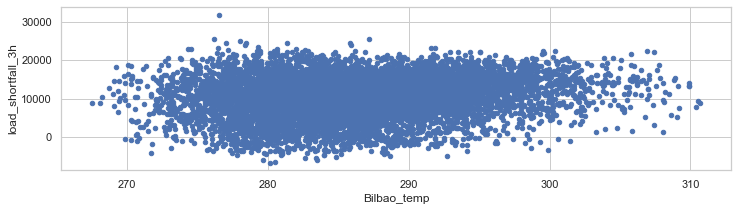

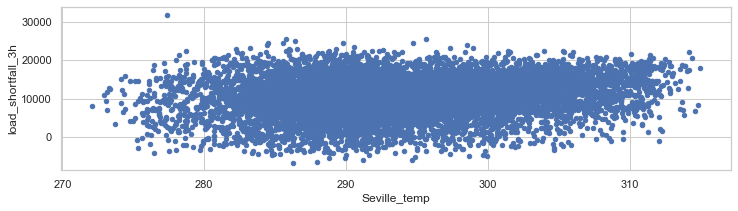

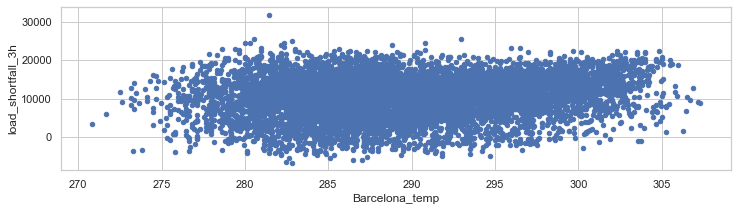

In [103]:

# wind speed
df.plot.scatter(x='Madrid_wind_speed',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_wind_speed',y='load_shortfall_3h', figsize=(12, 3))

# wind degrees
df.plot.scatter(x='Bilbao_wind_deg',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_wind_deg',y='load_shortfall_3h', figsize=(12, 3))

#rain
df.plot.scatter(x='Madrid_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_rain_1h',y='load_shortfall_3h', figsize=(12, 3))

#humidity

df.plot.scatter(x='Madrid_humidity',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_humidity',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_humidity',y='load_shortfall_3h', figsize=(12, 3))

#clouds
df.plot.scatter(x='Madrid_clouds_all',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_clouds_all',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_clouds_all',y='load_shortfall_3h', figsize=(12, 3))


#pressure
df.plot.scatter(x='Madrid_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_pressure',y='load_shortfall_3h', figsize=(12, 3))

#snow_3h
df.plot.scatter(x='Valencia_snow_3h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_snow_3h',y='load_shortfall_3h', figsize=(12, 3))

#rain_3h
df.plot.scatter(x='Seville_rain_3h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_rain_3h',y='load_shortfall_3h', figsize=(12, 3))

#weather_id
df.plot.scatter(x='Madrid_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_weather_id',y='load_shortfall_3h', figsize=(12, 3))

#temp_max
df.plot.scatter(x='Madrid_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp_max',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp_max',y='load_shortfall_3h', figsize=(12, 3))

#temp_min
df.plot.scatter(x='Madrid_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp_min',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp_min',y='load_shortfall_3h', figsize=(12, 3))

#temp
df.plot.scatter(x='Madrid_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp',y='load_shortfall_3h', figsize=(12, 3))

We observe no clear negative or positive correclation with regards to the features and load shortfall

In [104]:
# evaluate correlation
df.corr()


Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  \
Unnamed: 0              1.000000          -0.109288       -0.249633   
Madrid_wind_speed      -0.109288           1.000000        0.259719   
Bilbao_rain_1h         -0.249633           0.259719        1.000000   
Valencia_wind_speed    -0.090161           0.513092        0.265864   
Seville_humidity       -0.079025          -0.117892        0.069878   
Madrid_humidity        -0.103359          -0.137092        0.106765   
Bilbao_clouds_all      -0.068123           0.244001        0.370733   
Bilbao_wind_speed       0.049197           0.377854        0.085398   
Seville_clouds_all     -0.140583           0.191251        0.081131   
Bilbao_wind_deg        -0.155738           0.270950        0.279350   
Barcelona_wind_speed   -0.218781           0.294640        0.069997   
Barcelona_wind_deg     -0.140449          -0.095380       -0.030723   
Madrid_clouds_all      -0.116928           0.230126        0.135524   
Seville_wind_speed     -0.093926           0.434104        0.140101   
Barcelona_rain_1h      -0.075692           0.062758        0.052558   
Seville_rain_1h        -0.075340           0.108413        0.092984   
Bilbao_snow_3h         -0.092377           0.071183        0.096730   
Barcelona_pressure     -0.040157           0.011134        0.052458   
Seville_rain_3h        -0.082525           0.004795        0.016392   
Madrid_rain_1h         -0.068980           0.150446        0.187423   
Barcelona_rain_3h      -0.104326          -0.014644       -0.001412   
Valencia_snow_3h       -0.028130           0.021660        0.008269   
Madrid_weather_id       0.047202          -0.169358       -0.147768   
Barcelona_weather_id    0.034761          -0.099582       -0.120618   
Bilbao_pressure        -0.022475          -0.231747       -0.054814   
Seville_weather_id      0.072472          -0.120014       -0.095723   
Valencia_pressure       0.267772          -0.157088       -0.206765   
Seville_temp_max        0.039424           0.050043       -0.210323   
Madrid_pressure         0.385578          -0.136672       -0.298587   
Valencia_temp_max       0.087002           0.133468       -0.135198   
Valencia_temp           0.135294           0.128726       -0.127953   
Bilbao_weather_id       0.192485          -0.238128       -0.604616   
Seville_temp            0.042897           0.090861       -0.170009   
Valencia_humidity       0.023917          -0.285787       -0.103868   
Valencia_temp_min       0.185468           0.119657       -0.116835   
Barcelona_temp_max      0.047417           0.061854       -0.157326   
Madrid_temp_max         0.093378           0.091464       -0.148397   
Barcelona_temp          0.068078           0.080133       -0.138901   
Bilbao_temp_min         0.028698           0.077330       -0.141269   
Bilbao_temp             0.081799           0.060467       -0.182494   
Barcelona_temp_min      0.103436           0.089992       -0.106593   
Bilbao_temp_max         0.146216           0.042114       -0.219871   
Seville_temp_min        0.037487           0.110278       -0.120575   
Madrid_temp             0.088439           0.109572       -0.135927   
Madrid_temp_min         0.085197           0.098138       -0.116431   
load_shortfall_3h       0.192612          -0.150981       -0.152510   

                      Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
Unnamed: 0                      -0.090161         -0.079025        -0.103359   
Madrid_wind_speed                0.513092         -0.117892        -0.137092   
Bilbao_rain_1h                   0.265864          0.069878         0.106765   
Valencia_wind_speed              1.000000         -0.075227        -0.019388   
Seville_humidity                -0.075227          1.000000         0.799831   
Madrid_humidity                 -0.019388          0.799831         1.000000   
Bilbao_clouds_all                0.210524          0.061680         0.041878   
Bilbao_wind_speed                0.386478   

The following features are positively correclated with load_shortfall_3h
 - Madrid_wind_speed
 - Bilbao_rain_1h
 - Valencia_wind_speed
 - Seville_humidity
 - Madrid_humidity
 - Madrid_humidity
 - Bilbao_clouds_all
 - Bilbao_wind_speed
 - Seville_clouds_all
 - Bilbao_wind_deg
 - Barcelona_wind_speed
 - Barcelona_wind_deg
 - Madrid_clouds_all
 - Seville_wind_speed
 - Barcelona_rain_1h
 - Bilbao_snow_3h
 - Barcelona_pressure
 - Seville_rain_3h
 - Madrid_rain_1h
 - Barcelona_rain_3h
 - Valencia_snow_3h


The following features are negatively correclated with load_shortfall_3h

 
- Madrid_weather_id
- Barcelona_weather_id
- Bilbao_pressure
- Seville_weather_id
- Valencia_pressure
- Seville_temp_max
- Madrid_pressure
- Valencia_temp_max
- Valencia_temp
- Bilbao_weather_id
- Seville_temp
- Valencia_humidity
- Barcelona_temp_max
- Madrid_temp_max
- Barcelona_temp
- Bilbao_temp_min
- Bilbao_temp
- Barcelona_temp_min
- Bilbao_temp_max
- Seville_temp_min
- Madrid_temp
- Madrid_temp_min

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this section we will clean the dataset and engineer the features, as identified in the EDA phase. 

We will look at:

- Updating the categorical features (time,Valencia_wind_deg and Seville_pressure)
- Removing missing values
- Removing Outliers
- Variable selection using correlation
- Removing features with 0.0 values

__Updating the categorical features__

We will change the time data type to date data

In [88]:
#changing the time column from 'object' dtype to 'date'

df['time'] = pd.to_datetime(df['time'])

df["time"].info()

In [94]:
#to time series data
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
#data = pd.read_csv('df_train.csv', parse_dates=['time'], index_col='time',date_parser=dateparse)
#print ('\n Parsed Data:')

#data.info()

changing Valencia_wind_deg to numerical

In [95]:
df['Valencia_wind_deg']=df['Valencia_wind_deg'].str.extract('(\d+)')
df['Valencia_wind_deg'] = pd.to_numeric(df['Valencia_wind_deg'])

changing Seville_pressure to numerical

In [96]:
df['Seville_pressure']=df['Seville_pressure'].str.extract('(\d+)')
df['Seville_pressure'] = pd.to_numeric(dfnew['Seville_pressure'])
df['Seville_pressure'] 

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: int64

### Missing Values


We will replace the __Valencia_pressure__ missing values with the mean and then remove the columns, __Valencia_snow_3h__, __Bilbao_snow_3h__, __Seville_rain_3h__, and __Barcelona_rain_3h__ because they have only zero values.

In [97]:
# remove missing values/ features

#Filling missing value with the mean
df_clean = df.fillna(value=df['Valencia_pressure'].mean())
#removing the unnamed column
df_clean.drop('Unnamed: 0', inplace =True, axis=1)

#dropping column that have only zero values
df_clean.drop(columns =['Valencia_snow_3h', 'Bilbao_snow_3h', 'Seville_rain_3h', 'Barcelona_rain_3h'], inplace= True)

df_clean.head()


time  Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  \
0  2015-01-01 03:00:00           0.666667                  5             0.0   
1  2015-01-01 06:00:00           0.333333                 10             0.0   
2  2015-01-01 09:00:00           1.000000                  9             0.0   
3  2015-01-01 12:00:00           1.000000                  8             0.0   
4  2015-01-01 15:00:00           1.000000                  7             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   
2             1.000000         71.333333        64.333333                0.0   
3             1.000000         65.333333        56.333333                0.0   
4             1.000000         59.000000        57.000000                2.0   

   Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0           1.000000                 0.0       223.333333   
1           1.000000                 0.0       221.000000   
2           1.000000                 0.0       214.333333   
3           1.000000                 0.0       199.666667   
4           0.333333                 0.0       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   
3              2.333333          273.000000                0.0   
4              4.333333          260.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  \
0            3.333333                0.0                25              0.0   
1            3.333333                0.0                25              0.0   
2            2.666667                0.0                25              0.0   
3            4.000000                0.0                25              0.0   
4            3.000000                0.0                25              0.0   

   Barcelona_pressure  Madrid_rain_1h  Madrid_weather_id  \
0         1036.333333             0.0              800.0   
1         1037.333333             0.0              800.0   
2         1038.000000             0.0              800.0   
3         1037.000000             0.0              800.0   
4         1035.000000             0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   
2                 800.0      1036.000000               800.0   
3                 800.0      1036.000000               800.0   
4                 800.0      1035.333333               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   
2        1005.333333        278.792000       974.000000         278.008667   
3        1009.000000        285.394000       994.666667         284.899552   
4        1012.051407        285.513719      1035.333333         283.015115   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0     269.888000              800.0    274.254667          75.666667   
1     271.728333              800.0    274.945000          71.000000   
2     278.008667              800.0    278.792000          65.666667   
3     284.899552              800.0    285.394000          54.000000   
4     283.015115              800.0    285.513719          58.333333   

   Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  \
0         269.888000          281.013000       265.938000      281.013000   
1         271.7

There are now no variables with missing data

In [107]:
df_clean.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Barcelona_pressure      0
Madrid_rain_1h          0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_temp          0
Bilbao_temp_min         0
Bilbao_temp             0
Barcelona_te

### standardisation

Z-score standardisation handles outliers gracefully. Z-score standardisation is implemented by applying the following operation to each of our values

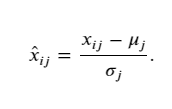

where μj represents the mean of variable xj and σj is the variable's standard deviation

Standardisation divides by a  distribution-aware measure, the standard deviation. While this doesn't completely remove the effects of outliers, it does consider them in a more conservative manner. 


In [108]:
# split predictors and response
X = df_clean.drop(['load_shortfall_3h','time','Valencia_wind_deg', 'Seville_pressure'], axis=1)
y = df_clean['load_shortfall_3h']

In [109]:
# Import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

In [110]:
# Create scaler object
scaler = StandardScaler()

In [111]:
# Create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

In [112]:
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)


X_standardise.head()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
0          -0.950708       -0.362123            -0.796169          0.516117   
1          -1.130863       -0.362123            -0.381412          0.692953   
2          -0.770554       -0.362123            -0.657917          0.383491   
3          -0.770554       -0.362123            -0.657917          0.118238   
4          -0.770554       -0.362123            -0.657917         -0.161751   

   Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
0         0.270621          -1.335491          -0.501451           -0.565065   
1         0.298017          -1.335491          -0.501451           -0.565065   
2         0.284319          -1.335491          -0.501451           -0.565065   
3        -0.044439          -1.335491          -0.501451           -0.565065   
4        -0.017043          -1.274045          -0.894581           -0.565065   

   Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  \
0         0.630823              1.932284           -1.660205   
1         0.607959              0.630270           -0.578686   
2         0.542632             -0.485743            1.520733   
3         0.398912             -0.299741            0.925711   
4         0.255192              0.816272            0.779762   

   Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  \
0          -0.694188            0.542975          -0.203099        -0.224278   
1          -0.694188            0.542975          -0.203099        -0.224278   
2          -0.694188            0.144442          -0.203099        -0.224278   
3          -0.694188            0.941509          -0.203099        -0.224278   
4          -0.694188            0.343708          -0.203099        -0.224278   

   Barcelona_pressure  Madrid_rain_1h  Madrid_weather_id  \
0           -0.024277       -0.247776           0.342424   
1           -0.024206       -0.247776           0.342424   
2           -0.024158       -0.247776           0.342424   
3           -0.024229       -0.247776           0.342424   
4           -0.024372       -0.247776           0.342424   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0              0.385993         1.718219            0.352274   
1              0.385993         1.784583            0.352274   
2              0.385993         1.817765            0.352274   
3              0.385993         1.817765            0.352274   
4              0.385993         1.751401            0.352274   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0      -1.129531e+00         -2.616796        -1.756232          -2.835227   
1      -9.289340e-01         -2.539014        -1.696165          -2.591966   
2      -8.085757e-01         -2.105564        -1.636097          -1.761812   
3      -3.672620e-01         -1.361703        -0.705052          -0.850953   
4       2.736630e-13         -1.348214         1.127003          -1.100044   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0      -2.890888           0.649842     -2.490266           0.540928   
1      -2.633926           0.649842     -2.403108           0.298645   
2      -1.757012           0.649842     -1.917409           0.021750   
3      -0.794849           0.649842     -1.083879          -0.583957   
4      -1.057970           0.649842     -1.068764          -0.358980   

   Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  \
0          -2.892663           -1.394813        -2.420380       -1.354598   
1          -2.626219           -1.456868        -2.374370       -1.423738   
2          -1.716949           -1.316350        -1.726058       -1.267176   
3          -0.719283           -1.061929        -0.783992       -0.983703   
4          -0.992113           -0.954814        -0.908771       -0.864356   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  

In [113]:
#combine presictors and response variable into one data frame
df2 = pd.concat([X_standardise, y], axis = 1)
df2.head()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
0          -0.950708       -0.362123            -0.796169          0.516117   
1          -1.130863       -0.362123            -0.381412          0.692953   
2          -0.770554       -0.362123            -0.657917          0.383491   
3          -0.770554       -0.362123            -0.657917          0.118238   
4          -0.770554       -0.362123            -0.657917         -0.161751   

   Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
0         0.270621          -1.335491          -0.501451           -0.565065   
1         0.298017          -1.335491          -0.501451           -0.565065   
2         0.284319          -1.335491          -0.501451           -0.565065   
3        -0.044439          -1.335491          -0.501451           -0.565065   
4        -0.017043          -1.274045          -0.894581           -0.565065   

   Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  \
0         0.630823              1.932284           -1.660205   
1         0.607959              0.630270           -0.578686   
2         0.542632             -0.485743            1.520733   
3         0.398912             -0.299741            0.925711   
4         0.255192              0.816272            0.779762   

   Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  \
0          -0.694188            0.542975          -0.203099        -0.224278   
1          -0.694188            0.542975          -0.203099        -0.224278   
2          -0.694188            0.144442          -0.203099        -0.224278   
3          -0.694188            0.941509          -0.203099        -0.224278   
4          -0.694188            0.343708          -0.203099        -0.224278   

   Barcelona_pressure  Madrid_rain_1h  Madrid_weather_id  \
0           -0.024277       -0.247776           0.342424   
1           -0.024206       -0.247776           0.342424   
2           -0.024158       -0.247776           0.342424   
3           -0.024229       -0.247776           0.342424   
4           -0.024372       -0.247776           0.342424   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0              0.385993         1.718219            0.352274   
1              0.385993         1.784583            0.352274   
2              0.385993         1.817765            0.352274   
3              0.385993         1.817765            0.352274   
4              0.385993         1.751401            0.352274   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0      -1.129531e+00         -2.616796        -1.756232          -2.835227   
1      -9.289340e-01         -2.539014        -1.696165          -2.591966   
2      -8.085757e-01         -2.105564        -1.636097          -1.761812   
3      -3.672620e-01         -1.361703        -0.705052          -0.850953   
4       2.736630e-13         -1.348214         1.127003          -1.100044   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0      -2.890888           0.649842     -2.490266           0.540928   
1      -2.633926           0.649842     -2.403108           0.298645   
2      -1.757012           0.649842     -1.917409           0.021750   
3      -0.794849           0.649842     -1.083879          -0.583957   
4      -1.057970           0.649842     -1.068764          -0.358980   

   Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  \
0          -2.892663           -1.394813        -2.420380       -1.354598   
1          -2.626219           -1.456868        -2.374370       -1.423738   
2          -1.716949           -1.316350        -1.726058       -1.267176   
3          -0.719283           -1.061929        -0.783992       -0.983703   
4          -0.992113           -0.954814        -0.908771       -0.864356   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  

### Variable Selection

We will exploring the correlations between the variables in order to do variable selection

In [114]:
df2.corr()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
Madrid_wind_speed              1.000000        0.259719             0.513092   
Bilbao_rain_1h                 0.259719        1.000000             0.265864   
Valencia_wind_speed            0.513092        0.265864             1.000000   
Seville_humidity              -0.117892        0.069878            -0.075227   
Madrid_humidity               -0.137092        0.106765            -0.019388   
Bilbao_clouds_all              0.244001        0.370733             0.210524   
Bilbao_wind_speed              0.377854        0.085398             0.386478   
Seville_clouds_all             0.191251        0.081131             0.163675   
Bilbao_wind_deg                0.270950        0.279350             0.248643   
Barcelona_wind_speed           0.294640        0.069997             0.347966   
Barcelona_wind_deg            -0.095380       -0.030723            -0.066071   
Madrid_clouds_all              0.230126        0.135524             0.221887   
Seville_wind_speed             0.434104        0.140101             0.316035   
Barcelona_rain_1h              0.062758        0.052558             0.031804   
Seville_rain_1h                0.108413        0.092984             0.046085   
Barcelona_pressure             0.011134        0.052458             0.050282   
Madrid_rain_1h                 0.150446        0.187423             0.093865   
Madrid_weather_id             -0.169358       -0.147768            -0.099056   
Barcelona_weather_id          -0.099582       -0.120618            -0.037605   
Bilbao_pressure               -0.231747       -0.054814            -0.096374   
Seville_weather_id            -0.120014       -0.095723            -0.069092   
Valencia_pressure             -0.142737       -0.199341            -0.038234   
Seville_temp_max               0.050043       -0.210323            -0.024045   
Madrid_pressure               -0.136672       -0.298587            -0.158475   
Valencia_temp_max              0.133468       -0.135198             0.065815   
Valencia_temp                  0.128726       -0.127953             0.072366   
Bilbao_weather_id             -0.238128       -0.604616            -0.201379   
Seville_temp                   0.090861       -0.170009            -0.008508   
Valencia_humidity             -0.285787       -0.103868            -0.413017   
Valencia_temp_min              0.119657       -0.116835             0.075533   
Barcelona_temp_max             0.061854       -0.157326            -0.040998   
Madrid_temp_max                0.091464       -0.148397            -0.021970   
Barcelona_temp                 0.080133       -0.138901            -0.021456   
Bilbao_temp_min                0.077330       -0.141269            -0.010166   
Bilbao_temp                    0.060467       -0.182494            -0.022676   
Barcelona_temp_min             0.089992       -0.106593             0.001413   
Bilbao_temp_max                0.042114       -0.219871            -0.033271   
Seville_temp_min               0.110278       -0.120575             0.003618   
Madrid_temp                    0.109572       -0.135927            -0.011982   
Madrid_temp_min                0.098138       -0.116431            -0.019742   
load_shortfall_3h             -0.150981       -0.152510            -0.142791   

                      Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
Madrid_wind_speed            -0.117892        -0.137092           0.244001   
Bilbao_rain_1h                0.069878         0.106765           0.370733   
Valencia_wind_speed          -0.075227        -0.019388           0.210524   
Seville_humidity              1.000000         0.799831           0.061680   
Madrid_humidity               0.799831         1.000000           0.041878   
Bilbao_clouds_all             0.061680         0.041878           1.000000   
Bilbao_wind_speed            -0.088180        -0.016808           0.031915   
Seville_clouds_all            0.39943

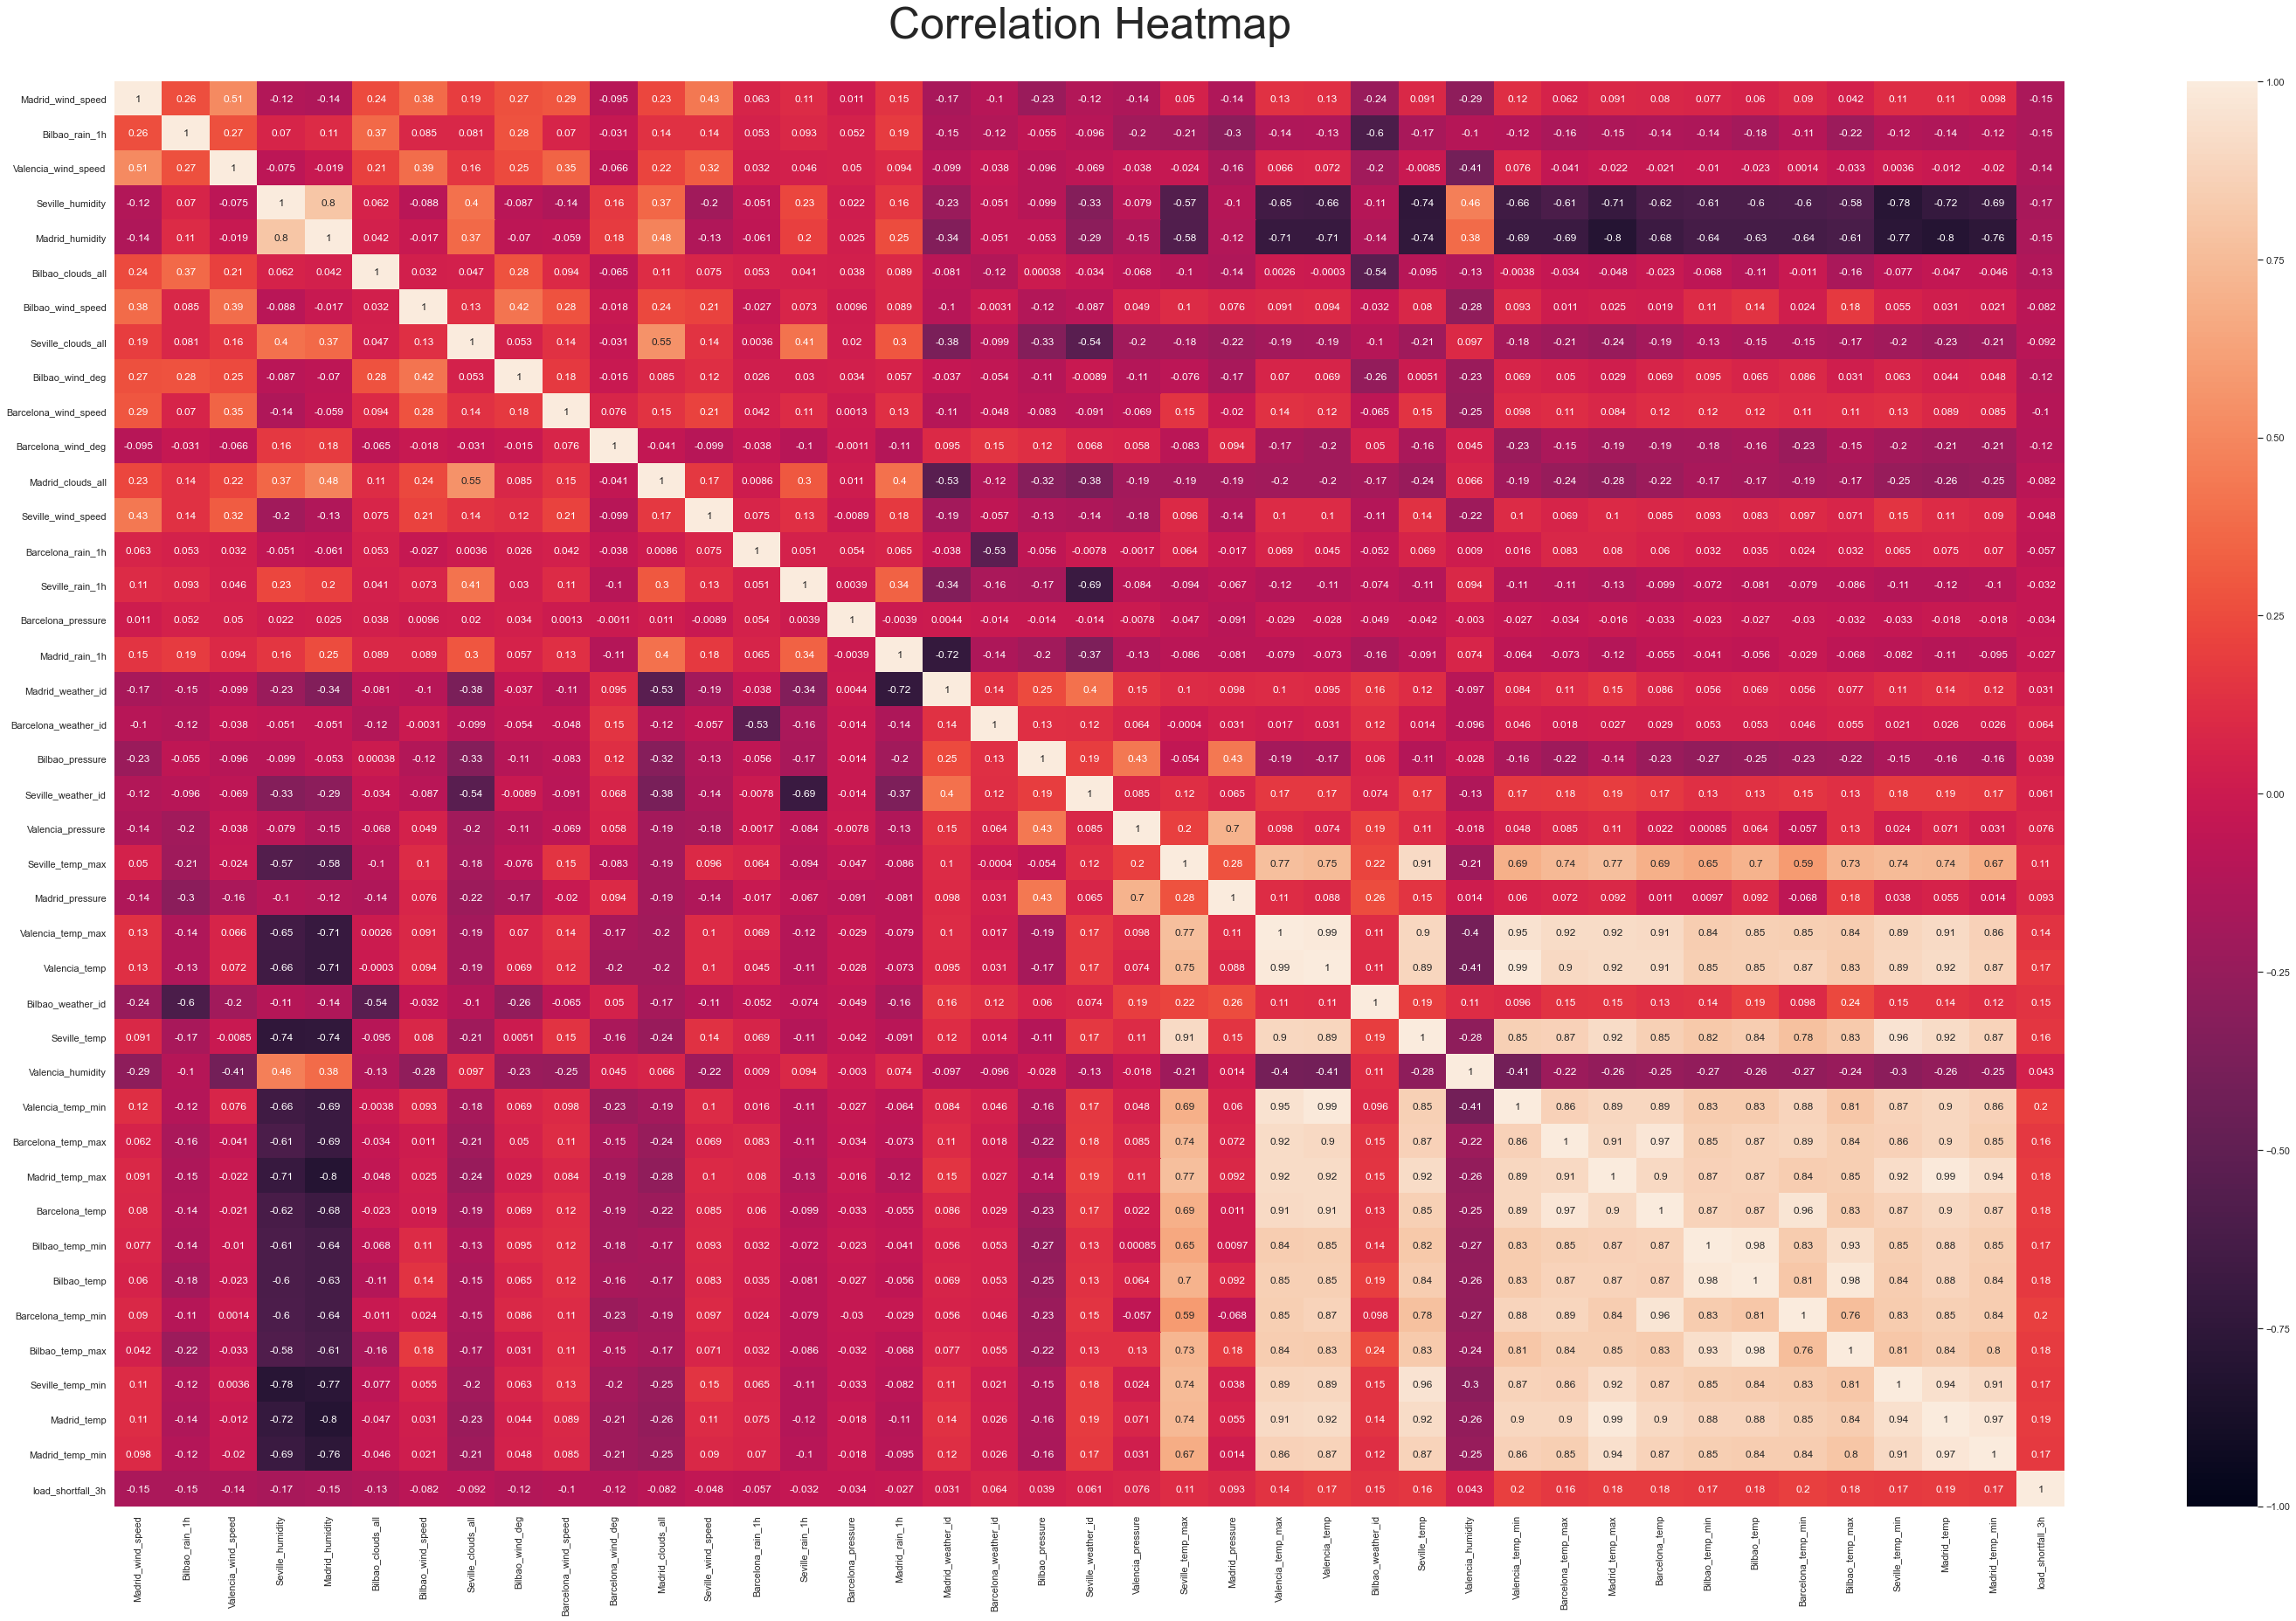

In [115]:
# engineer existing features
correlation = df2.corr()

plt.figure(figsize =(50,30))
thegraph = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
thegraph.set_title('Correlation Heatmap', fontdict={'fontsize':50}, pad=50);




In the **Heatmap** above, we observe a high number of highly correlated features, amongst the minimum and maximum temperatures.


This can be problematic because it will becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently as the independent variables will tend to change in unison. To train our model well, we blieve it is better to drop those features that highly correlated to each other.


The code below will remove one of each of the highly correlated pairs of features that are highly correlated with each other.

In [116]:
def correlations(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
            

In [117]:
corr_features = correlations(df2, 0.6)
len(set(corr_features))
print('Correlated features: ', len(set(corr_features)))
print('Correlated features are: ', corr_features)

Correlated features:  19
Correlated features are:  {'Bilbao_temp', 'Madrid_temp_max', 'Barcelona_temp_min', 'Bilbao_temp_min', 'Madrid_temp_min', 'Seville_temp', 'Barcelona_temp', 'Madrid_pressure', 'Madrid_humidity', 'Seville_weather_id', 'Barcelona_temp_max', 'Madrid_temp', 'Valencia_temp_min', 'Seville_temp_min', 'Valencia_temp', 'Bilbao_temp_max', 'Madrid_weather_id', 'Valencia_temp_max', 'Bilbao_weather_id'}


In [118]:
df2.shape

(8763, 41)

In [119]:
df2_non_corr=df2.drop(corr_features, axis=1)

In [120]:
df2_non_corr.shape

(8763, 22)

In [121]:
df2_non_corr.corr()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
Madrid_wind_speed              1.000000        0.259719             0.513092   
Bilbao_rain_1h                 0.259719        1.000000             0.265864   
Valencia_wind_speed            0.513092        0.265864             1.000000   
Seville_humidity              -0.117892        0.069878            -0.075227   
Bilbao_clouds_all              0.244001        0.370733             0.210524   
Bilbao_wind_speed              0.377854        0.085398             0.386478   
Seville_clouds_all             0.191251        0.081131             0.163675   
Bilbao_wind_deg                0.270950        0.279350             0.248643   
Barcelona_wind_speed           0.294640        0.069997             0.347966   
Barcelona_wind_deg            -0.095380       -0.030723            -0.066071   
Madrid_clouds_all              0.230126        0.135524             0.221887   
Seville_wind_speed             0.434104        0.140101             0.316035   
Barcelona_rain_1h              0.062758        0.052558             0.031804   
Seville_rain_1h                0.108413        0.092984             0.046085   
Barcelona_pressure             0.011134        0.052458             0.050282   
Madrid_rain_1h                 0.150446        0.187423             0.093865   
Barcelona_weather_id          -0.099582       -0.120618            -0.037605   
Bilbao_pressure               -0.231747       -0.054814            -0.096374   
Valencia_pressure             -0.142737       -0.199341            -0.038234   
Seville_temp_max               0.050043       -0.210323            -0.024045   
Valencia_humidity             -0.285787       -0.103868            -0.413017   
load_shortfall_3h             -0.150981       -0.152510            -0.142791   

                      Seville_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
Madrid_wind_speed            -0.117892           0.244001           0.377854   
Bilbao_rain_1h                0.069878           0.370733           0.085398   
Valencia_wind_speed          -0.075227           0.210524           0.386478   
Seville_humidity              1.000000           0.061680          -0.088180   
Bilbao_clouds_all             0.061680           1.000000           0.031915   
Bilbao_wind_speed            -0.088180           0.031915           1.000000   
Seville_clouds_all            0.399436           0.046737           0.127344   
Bilbao_wind_deg              -0.087246           0.280154           0.417534   
Barcelona_wind_speed         -0.138625           0.094019           0.275317   
Barcelona_wind_deg            0.164064          -0.065120          -0.018225   
Madrid_clouds_all             0.366602           0.109788           0.239326   
Seville_wind_speed           -0.202449           0.075066           0.213420   
Barcelona_rain_1h            -0.051022           0.052913          -0.026640   
Seville_rain_1h               0.227476           0.041090           0.073080   
Barcelona_pressure            0.021599           0.037506           0.009572   
Madrid_rain_1h                0.164019           0.089281           0.088502   
Barcelona_weather_id         -0.050515          -0.124169          -0.003074   
Bilbao_pressure              -0.099458           0.000377          -0.122915   
Valencia_pressure            -0.078962          -0.067832           0.049049   
Seville_temp_max             -0.566426          -0.102322           0.103342   
Valencia_humidity             0.464012          -0.129684          -0.279825   
load_shortfall_3h            -0.167290          -0.127293          -0.081602   

                      Seville_clouds_all  Bilbao_wind_deg  \
Madrid_wind_speed               0.191251         0.270950   
Bilbao_rain_1h                  0.081131         0.279350   
Valencia_wind_speed             0.163675         0.248643   
Seville_humidity                0.399436        -0.087246   
Bilbao_clouds_all               0.0

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, we will create one or more regression models that are able to accurately predict the thee hour load shortfall. 


### 5.1 Fitting   linear regression models using Sklearn and OLS

We will first fit the cleaned data using Sklearn and OLS


__(i). *Sklearn*__

In [122]:
# split predictors and response
X = df2.drop(['load_shortfall_3h'], axis=1)
y = df2['load_shortfall_3h']

In [123]:
# create model object
lm = LinearRegression()

In [124]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [125]:
# train model
lm.fit(X_train, y_train)

LinearRegression()

In [126]:
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [127]:
# extract model intercept
beta_0 = float(lm.intercept_)

In [128]:
print("Intercept:", beta_0)



Intercept: 10675.343085560495


In [129]:
beta_js

Coefficient
Madrid_wind_speed     -519.792053
Bilbao_rain_1h        -125.805044
Valencia_wind_speed   -224.490655
Seville_humidity      -884.020023
Madrid_humidity          1.949431
Bilbao_clouds_all     -161.350384
Bilbao_wind_speed     -121.784213
Seville_clouds_all       3.931402
Bilbao_wind_deg       -230.202516
Barcelona_wind_speed  -166.279365
Barcelona_wind_deg    -317.994145
Madrid_clouds_all      268.779123
Seville_wind_speed     -32.364686
Barcelona_rain_1h     -108.681673
Seville_rain_1h        116.266635
Barcelona_pressure     -71.632904
Madrid_rain_1h          53.048620
Madrid_weather_id      -45.746184
Barcelona_weather_id   131.498053
Bilbao_pressure        -58.938515
Seville_weather_id     107.422408
Valencia_pressure      143.722069
Seville_temp_max     -1645.851374
Madrid_pressure        301.983608
Valencia_temp_max    -1205.841183
Valencia_temp        -2761.455979
Bilbao_weather_id      174.606074
Seville_temp          3244.646465
Valencia_humidity      315.948307
Valencia_temp_min     4125.962653
Barcelona_temp_max    -600.054235
Madrid_temp_max      -2378.346290
Barcelona_temp        2215.222569
Bilbao_temp_min       3717.741312
Bilbao_temp          -7412.509098
Barcelona_temp_min    -779.808832
Bilbao_temp_max       3765.639997
Seville_temp_min     -2771.026694
Madrid_temp           4960.698182
Madrid_temp_min      -2227.425322

__*Predictive accuracy*__

In [130]:
# Import metrics module
from sklearn import metrics

In [131]:
train_pred = lm.predict(X_train)

test_pred = lm.predict(X_test)

In [132]:
print('Train MSE:', round(metrics.mean_squared_error(y_train, train_pred)))

Train MSE: 23371957


In [133]:
print('Test MSE:', round(metrics.mean_squared_error(y_test, test_pred)))

Test MSE: 22680518


In [134]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

RMSE:  4762.4067506338215


__*Kaggle*__

Prepare test dataset

In [135]:
df_test= pd.read_csv("df_test.csv")
df_test.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0        8763  2018-01-01 00:00:00           5.000000           level_8   
1        8764  2018-01-01 03:00:00           4.666667           level_8   
2        8765  2018-01-01 06:00:00           2.333333           level_7   
3        8766  2018-01-01 09:00:00           2.666667           level_7   
4        8767  2018-01-01 12:00:00           4.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000         87.000000        71.333333   
1             0.0             5.333333         89.000000        78.000000   
2             0.0             5.000000         89.000000        89.666667   
3             0.0             5.333333         93.333333        82.666667   
4             0.0             8.666667         65.333333        64.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0          20.000000           3.000000            0.000000       193.333333   
1           0.000000           3.666667            0.000000       143.333333   
2           0.000000           2.333333            6.666667       130.000000   
3          26.666667           5.666667            6.666667       196.666667   
4          26.666667          10.666667            0.000000       233.333333   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              4.000000          176.666667                0.0   
1              4.666667          266.666667                0.0   
2              4.000000          263.333333                0.0   
3              2.333333           86.666667                0.0   
4              4.666667          283.333333                0.0   

   Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  \
0            1.000000                0.0             sp25              0.0   
1            0.666667                0.0             sp25              0.0   
2            0.666667                0.0             sp25              0.0   
3            1.333333                0.0             sp25              0.0   
4            1.000000                0.0             sp25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0               0         1017.333333              0.0             0.0   
1               0         1020.333333              0.0             0.0   
2               0         1023.000000              0.0             0.0   
3               0         1025.666667              0.0             0.0   
4               0         1026.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0                 0              800.0   
1                0.0                 0              800.0   
2                0.0                 0              800.0   
3                0.0                 0              800.0   
4                0.0                 0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0            800.000000      1025.666667          800.000000   
1            800.333333      1026.666667          800.000000   
2            800.000000      1025.333333          800.333333   
3            800.000000      1025.000000          800.333333   
4            800.333333      1022.333333          800.000000   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0                NaN        284.483333      1030.000000         287.483333   
1                NaN        282.483333      1030.333333         284.150000   
2                NaN        280.816667      1030.666667         282.816667   
3                NaN        281.150000      1032.333333         283.483333   
4                NaN        287.150000      1032.333333         287.150000   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0   

In [136]:
# remove missing values/ features

#Filling missing value with the mean
df_clean_test = df_test.fillna(value=df['Valencia_pressure'].mean())
#removing the unnamed column
df_clean_test.drop('Unnamed: 0', inplace =True, axis=1)

#dropping column that have only zero values
df_clean_test.drop(columns =['Valencia_snow_3h', 'Bilbao_snow_3h', 'Seville_rain_3h', 'Barcelona_rain_3h'], inplace= True)


Scaling Test Data frame

In [137]:
# split predictors and response
X_test= df_clean_test.drop(['time','Valencia_wind_deg', 'Seville_pressure'], axis=1)

In [138]:
# Import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

In [139]:
# Create scaled version of the predictors (there is no need to scale the response)
X_scaled_test = scaler.fit_transform(X_test)

In [140]:
# Convert the scaled predictor values into a dataframe
X_standardise_test = pd.DataFrame(X_scaled,columns=X.columns)

Predictions on test

In [141]:
preds=lm.predict(X_standardise_test)

In [142]:
daf=pd.DataFrame(preds,columns=['load_shortfall_3h'])
daf.head()

load_shortfall_3h
0        9963.082442
1        9628.048403
2        9559.469880
3       10351.067490
4       11161.327123

In [143]:
output=pd.DataFrame({'time':df_test['time']})
submission=output.join(daf)
#submission.to_csv('submission.csv',index=False)

submission

time  load_shortfall_3h
0     2018-01-01 00:00:00        9963.082442
1     2018-01-01 03:00:00        9628.048403
2     2018-01-01 06:00:00        9559.469880
3     2018-01-01 09:00:00       10351.067490
4     2018-01-01 12:00:00       11161.327123
...                   ...                ...
2915  2018-12-31 09:00:00        9398.745683
2916  2018-12-31 12:00:00        8495.964601
2917  2018-12-31 15:00:00        9337.832831
2918  2018-12-31 18:00:00        7477.899167
2919  2018-12-31 21:00:00        7788.560315

[2920 rows x 2 columns]

 
 
 __*(ii). Fitting a Linear regression model using statmodels.OLS*__


In [144]:
import statsmodels.formula.api as sm

In [145]:
df2.head()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
0          -0.950708       -0.362123            -0.796169          0.516117   
1          -1.130863       -0.362123            -0.381412          0.692953   
2          -0.770554       -0.362123            -0.657917          0.383491   
3          -0.770554       -0.362123            -0.657917          0.118238   
4          -0.770554       -0.362123            -0.657917         -0.161751   

   Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
0         0.270621          -1.335491          -0.501451           -0.565065   
1         0.298017          -1.335491          -0.501451           -0.565065   
2         0.284319          -1.335491          -0.501451           -0.565065   
3        -0.044439          -1.335491          -0.501451           -0.565065   
4        -0.017043          -1.274045          -0.894581           -0.565065   

   Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  \
0         0.630823              1.932284           -1.660205   
1         0.607959              0.630270           -0.578686   
2         0.542632             -0.485743            1.520733   
3         0.398912             -0.299741            0.925711   
4         0.255192              0.816272            0.779762   

   Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  \
0          -0.694188            0.542975          -0.203099        -0.224278   
1          -0.694188            0.542975          -0.203099        -0.224278   
2          -0.694188            0.144442          -0.203099        -0.224278   
3          -0.694188            0.941509          -0.203099        -0.224278   
4          -0.694188            0.343708          -0.203099        -0.224278   

   Barcelona_pressure  Madrid_rain_1h  Madrid_weather_id  \
0           -0.024277       -0.247776           0.342424   
1           -0.024206       -0.247776           0.342424   
2           -0.024158       -0.247776           0.342424   
3           -0.024229       -0.247776           0.342424   
4           -0.024372       -0.247776           0.342424   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0              0.385993         1.718219            0.352274   
1              0.385993         1.784583            0.352274   
2              0.385993         1.817765            0.352274   
3              0.385993         1.817765            0.352274   
4              0.385993         1.751401            0.352274   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0      -1.129531e+00         -2.616796        -1.756232          -2.835227   
1      -9.289340e-01         -2.539014        -1.696165          -2.591966   
2      -8.085757e-01         -2.105564        -1.636097          -1.761812   
3      -3.672620e-01         -1.361703        -0.705052          -0.850953   
4       2.736630e-13         -1.348214         1.127003          -1.100044   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0      -2.890888           0.649842     -2.490266           0.540928   
1      -2.633926           0.649842     -2.403108           0.298645   
2      -1.757012           0.649842     -1.917409           0.021750   
3      -0.794849           0.649842     -1.083879          -0.583957   
4      -1.057970           0.649842     -1.068764          -0.358980   

   Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  \
0          -2.892663           -1.394813        -2.420380       -1.354598   
1          -2.626219           -1.456868        -2.374370       -1.423738   
2          -1.716949           -1.316350        -1.726058       -1.267176   
3          -0.719283           -1.061929        -0.783992       -0.983703   
4          -0.992113           -0.954814        -0.908771       -0.864356   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  

In [146]:
df3 = df2.copy(deep=True)
df3.head()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
0          -0.950708       -0.362123            -0.796169          0.516117   
1          -1.130863       -0.362123            -0.381412          0.692953   
2          -0.770554       -0.362123            -0.657917          0.383491   
3          -0.770554       -0.362123            -0.657917          0.118238   
4          -0.770554       -0.362123            -0.657917         -0.161751   

   Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
0         0.270621          -1.335491          -0.501451           -0.565065   
1         0.298017          -1.335491          -0.501451           -0.565065   
2         0.284319          -1.335491          -0.501451           -0.565065   
3        -0.044439          -1.335491          -0.501451           -0.565065   
4        -0.017043          -1.274045          -0.894581           -0.565065   

   Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  \
0         0.630823              1.932284           -1.660205   
1         0.607959              0.630270           -0.578686   
2         0.542632             -0.485743            1.520733   
3         0.398912             -0.299741            0.925711   
4         0.255192              0.816272            0.779762   

   Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  \
0          -0.694188            0.542975          -0.203099        -0.224278   
1          -0.694188            0.542975          -0.203099        -0.224278   
2          -0.694188            0.144442          -0.203099        -0.224278   
3          -0.694188            0.941509          -0.203099        -0.224278   
4          -0.694188            0.343708          -0.203099        -0.224278   

   Barcelona_pressure  Madrid_rain_1h  Madrid_weather_id  \
0           -0.024277       -0.247776           0.342424   
1           -0.024206       -0.247776           0.342424   
2           -0.024158       -0.247776           0.342424   
3           -0.024229       -0.247776           0.342424   
4           -0.024372       -0.247776           0.342424   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0              0.385993         1.718219            0.352274   
1              0.385993         1.784583            0.352274   
2              0.385993         1.817765            0.352274   
3              0.385993         1.817765            0.352274   
4              0.385993         1.751401            0.352274   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0      -1.129531e+00         -2.616796        -1.756232          -2.835227   
1      -9.289340e-01         -2.539014        -1.696165          -2.591966   
2      -8.085757e-01         -2.105564        -1.636097          -1.761812   
3      -3.672620e-01         -1.361703        -0.705052          -0.850953   
4       2.736630e-13         -1.348214         1.127003          -1.100044   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0      -2.890888           0.649842     -2.490266           0.540928   
1      -2.633926           0.649842     -2.403108           0.298645   
2      -1.757012           0.649842     -1.917409           0.021750   
3      -0.794849           0.649842     -1.083879          -0.583957   
4      -1.057970           0.649842     -1.068764          -0.358980   

   Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  \
0          -2.892663           -1.394813        -2.420380       -1.354598   
1          -2.626219           -1.456868        -2.374370       -1.423738   
2          -1.716949           -1.316350        -1.726058       -1.267176   
3          -0.719283           -1.061929        -0.783992       -0.983703   
4          -0.992113           -0.954814        -0.908771       -0.864356   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  

In [147]:
formula_str = df3.columns[-1] +' ~ '+'+'.join(df3.drop(['load_shortfall_3h'], axis=1).columns[:-1]);formula_str

'load_shortfall_3h ~ Madrid_wind_speed+Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_clouds_all+Bilbao_wind_speed+Seville_clouds_all+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Madrid_clouds_all+Seville_wind_speed+Barcelona_rain_1h+Seville_rain_1h+Barcelona_pressure+Madrid_rain_1h+Madrid_weather_id+Barcelona_weather_id+Bilbao_pressure+Seville_weather_id+Valencia_pressure+Seville_temp_max+Madrid_pressure+Valencia_temp_max+Valencia_temp+Bilbao_weather_id+Seville_temp+Valencia_humidity+Valencia_temp_min+Barcelona_temp_max+Madrid_temp_max+Barcelona_temp+Bilbao_temp_min+Bilbao_temp+Barcelona_temp_min+Bilbao_temp_max+Seville_temp_min+Madrid_temp'

__construct and fit the model__

In [148]:
model=sm.ols(formula=formula_str, data=df3)

In [149]:
fitted = model.fit()

__Print model summary__

In [150]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sun, 27 Feb 2022   Prob (F-statistic):          9.38e-260
Time:                        10:21:32   Log-Likelihood:                -86763.
No. Observations:                8763   AIC:                         1.736e+05
Df Residuals:                    8723   BIC:                         1.739e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.067e+04 

### 5.2 fitting a model on the non-correlated dataset

We can also fit a model on the datatset df2_non_corr In this dataset variables have been selected based on their correlation and multicollineary.

__(i). using ols__

In [151]:
df4 =df2_non_corr.copy(deep=True)

In [152]:
formula_str = df4.columns[-1] +' ~ '+'+'.join(df4.drop(['load_shortfall_3h'], axis=1).columns[:-1]);formula_str

'load_shortfall_3h ~ Madrid_wind_speed+Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Bilbao_clouds_all+Bilbao_wind_speed+Seville_clouds_all+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Madrid_clouds_all+Seville_wind_speed+Barcelona_rain_1h+Seville_rain_1h+Barcelona_pressure+Madrid_rain_1h+Barcelona_weather_id+Bilbao_pressure+Valencia_pressure+Seville_temp_max'

In [153]:
fitted = model.fit()

In [154]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sun, 27 Feb 2022   Prob (F-statistic):          9.38e-260
Time:                        10:21:42   Log-Likelihood:                -86763.
No. Observations:                8763   AIC:                         1.736e+05
Df Residuals:                    8723   BIC:                         1.739e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.067e+04 

In [155]:
#mse of residuals
fitted.mse_resid

23413138.15203971

In [156]:
#rmse of residuals
np.sqrt(fitted.mse_resid)

4838.712447752988

In [157]:
#total mse
fitted.mse_total

27228008.274591047

__Checking for independence__

Sklearn is limited in terms of metrics and tools available to evaluate the appropriateness of the regression models we fit. 
With the statsmodels library there has a more broas set of statistical tools to help us, which enable us to expand our analysis.

In [ ]:
# checking for independence
fig, axs = plt.subplots(2,5, figsize=(14,6),sharey=True)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
fig.suptitle('Predictor variables vs. model residuals', fontsize=16)
axs = axs.ravel()

for index, column in enumerate(df4.columns):
    axs[index-1].set_title("{}".format(column),fontsize=12)
    axs[index-1].scatter(x=df4[column],y=fitted.resid,color='blue',edgecolor='k')
    axs[index-1].grid(True)
    xmin = min(df4[column])
    xmax = max(df4[column])
    axs[index-1].hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    if index == 1 or index == 6:
        axs[index-1].set_ylabel('Residuals')


there is obvious clustering in most of the predictor variables which i a clear indication of high dependency

__. checking for normality__

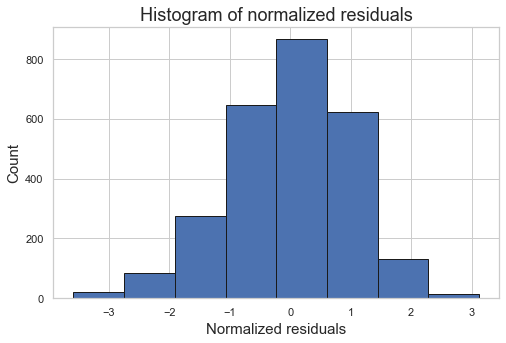

In [62]:
#histogram of normalized residuals
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

the normalized residuals are approximately normal

__. QQ plots of the residuals__

In [64]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 576x360 with 0 Axes>

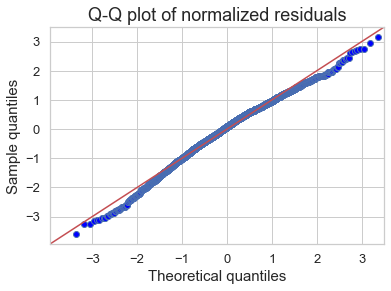

In [65]:
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

judging only from the two checks above, the residuals do appear to be normally distributed.

__(ii) using sklearn__

In [151]:
X = df4.drop(['load_shortfall_3h'], axis=1)
y = df4['load_shortfall_3h']

In [152]:
lm = LinearRegression()

In [153]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [154]:
lm.fit(X_train, y_train)

LinearRegression()

In [155]:
#predictive accuracy
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  4970.560119371177


### 5.3 Fitting a  regularized linear regression model

Regularisation offers an alternative method to the variable selection selection performed above. With regularisation the intention to scale each feature by how much it affects. There is a penality on those individual coefficients that get too large (those that contribute the most to reducing the fit).


We will now offer an alternative model. Where there is no descrete variable selection as above but a model that is achieved through ridge regression

#### Ridge Regression

In [160]:
df_ridge=df2.copy(deep=True)

In [161]:
df_ridge.head()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
0          -0.950708       -0.362123            -0.796169          0.516117   
1          -1.130863       -0.362123            -0.381412          0.692953   
2          -0.770554       -0.362123            -0.657917          0.383491   
3          -0.770554       -0.362123            -0.657917          0.118238   
4          -0.770554       -0.362123            -0.657917         -0.161751   

   Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
0         0.270621          -1.335491          -0.501451           -0.565065   
1         0.298017          -1.335491          -0.501451           -0.565065   
2         0.284319          -1.335491          -0.501451           -0.565065   
3        -0.044439          -1.335491          -0.501451           -0.565065   
4        -0.017043          -1.274045          -0.894581           -0.565065   

   Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  \
0         0.630823              1.932284           -1.660205   
1         0.607959              0.630270           -0.578686   
2         0.542632             -0.485743            1.520733   
3         0.398912             -0.299741            0.925711   
4         0.255192              0.816272            0.779762   

   Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  \
0          -0.694188            0.542975          -0.203099        -0.224278   
1          -0.694188            0.542975          -0.203099        -0.224278   
2          -0.694188            0.144442          -0.203099        -0.224278   
3          -0.694188            0.941509          -0.203099        -0.224278   
4          -0.694188            0.343708          -0.203099        -0.224278   

   Barcelona_pressure  Madrid_rain_1h  Madrid_weather_id  \
0           -0.024277       -0.247776           0.342424   
1           -0.024206       -0.247776           0.342424   
2           -0.024158       -0.247776           0.342424   
3           -0.024229       -0.247776           0.342424   
4           -0.024372       -0.247776           0.342424   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0              0.385993         1.718219            0.352274   
1              0.385993         1.784583            0.352274   
2              0.385993         1.817765            0.352274   
3              0.385993         1.817765            0.352274   
4              0.385993         1.751401            0.352274   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0      -1.129531e+00         -2.616796        -1.756232          -2.835227   
1      -9.289340e-01         -2.539014        -1.696165          -2.591966   
2      -8.085757e-01         -2.105564        -1.636097          -1.761812   
3      -3.672620e-01         -1.361703        -0.705052          -0.850953   
4       2.736630e-13         -1.348214         1.127003          -1.100044   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0      -2.890888           0.649842     -2.490266           0.540928   
1      -2.633926           0.649842     -2.403108           0.298645   
2      -1.757012           0.649842     -1.917409           0.021750   
3      -0.794849           0.649842     -1.083879          -0.583957   
4      -1.057970           0.649842     -1.068764          -0.358980   

   Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  \
0          -2.892663           -1.394813        -2.420380       -1.354598   
1          -2.626219           -1.456868        -2.374370       -1.423738   
2          -1.716949           -1.316350        -1.726058       -1.267176   
3          -0.719283           -1.061929        -0.783992       -0.983703   
4          -0.992113           -0.954814        -0.908771       -0.864356   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  

In [163]:
X = df_ridge.drop(['load_shortfall_3h'], axis=1)
y = df_ridge['load_shortfall_3h']

In [164]:
# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

In [165]:
# Split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_standardise, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False)

In [166]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [167]:
# Create ridge model
ridge = Ridge()

In [168]:
# Train the model
ridge.fit(X_train, y_train)

Ridge()

In [169]:
# Extract the model intercept value
b0 = float(ridge.intercept_)

In [170]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [171]:
print("Intercept:", float(b0))

Intercept: 10530.006548650243


In [172]:
# Check out the coefficients
coeff

Coefficient
Madrid_wind_speed     -461.765916
Bilbao_rain_1h        -120.067238
Valencia_wind_speed   -149.802105
Seville_humidity      -927.265469
Madrid_humidity         15.427088
Bilbao_clouds_all     -168.246747
Bilbao_wind_speed      -57.109798
Seville_clouds_all      68.625637
Bilbao_wind_deg       -379.752723
Barcelona_wind_speed  -164.097605
Barcelona_wind_deg    -219.849984
Madrid_clouds_all      332.031936
Seville_wind_speed     -35.864914
Barcelona_rain_1h      -82.423110
Seville_rain_1h        158.575300
Barcelona_pressure     -76.951895
Madrid_rain_1h          42.082260
Madrid_weather_id       35.103764
Barcelona_weather_id   103.244419
Bilbao_pressure         -2.429821
Seville_weather_id     126.010731
Valencia_pressure      193.753719
Seville_temp_max     -1391.918246
Madrid_pressure        137.990802
Valencia_temp_max     -996.289967
Valencia_temp        -2294.320836
Bilbao_weather_id      117.243342
Seville_temp          2892.955378
Valencia_humidity      645.568459
Valencia_temp_min     3793.166715
Barcelona_temp_max    -626.971617
Madrid_temp_max      -2950.331292
Barcelona_temp        2099.482518
Bilbao_temp_min       3104.819573
Bilbao_temp          -6114.136550
Barcelona_temp_min    -671.708947
Bilbao_temp_max       3263.114230
Seville_temp_min     -2535.378745
Madrid_temp           4848.215396
Madrid_temp_min      -1973.364434

__*Predictive accuracy of the  model*__ 

In [173]:
# Import metrics module
from sklearn import metrics

In [174]:
train_ridge = ridge.predict(X_train)

In [175]:
print('Ridge Train MSE:', round(metrics.mean_squared_error(y_train, train_ridge)))

Ridge Train MSE: 23333679


In [176]:
test_ridge = ridge.predict(X_test)

In [177]:
print('Ridge train MS :', round(metrics.mean_squared_error(y_test, test_ridge)))

Ridge train MS : 23431943


In [179]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,test_ridge)))

RMSE:  4840.655187683364


### 5.4. Building a Random Forest Regression Model

In [101]:
X = df4.drop(['load_shortfall_3h'], axis=1)
y = df4['load_shortfall_3h']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train test split
x_train, x_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=6)

In [90]:
#fitting decision tree
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [91]:
#testing
from sklearn.metrics import mean_squared_error
# Get predictions
y_pred = RF.predict(x_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 4603.028077880239


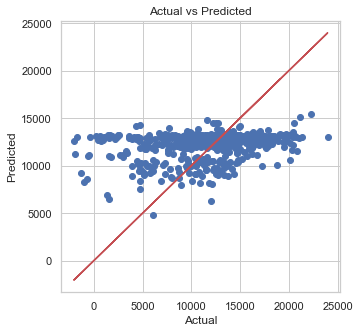

In [92]:
#fit actual vs expected
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()


__Tuning model hyperparameters__

In [93]:
# 2 trees in forest
forest_1 = RandomForestRegressor(n_estimators=2, max_depth=5, random_state=23)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=23)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23)

In [94]:
forest_1.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=2, random_state=23)

In [95]:
forest_2.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=23)

In [96]:
forest_3.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=23)

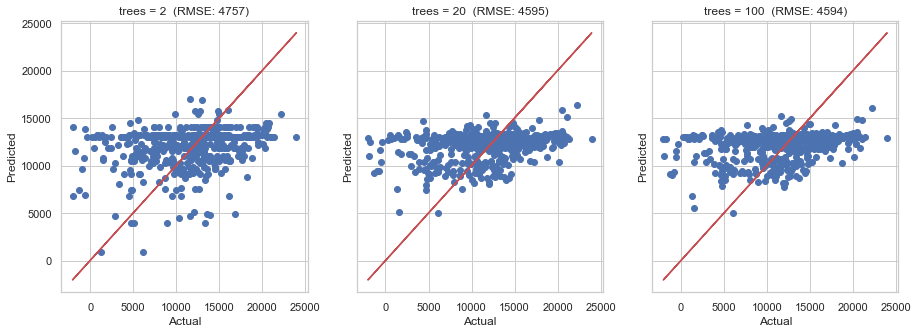

In [97]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [forest_1.predict(x_test), forest_2.predict(x_test), forest_3.predict(x_test)]
title = ['trees = 2', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

Looking at the RMSEs, the forest with 100 trees performed the best

### 5.5. Fit a decision tree model

In [83]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=5)
DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [86]:
# Get predictions
y_pred = DT.predict(x_test)
# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 4901.4175474275025


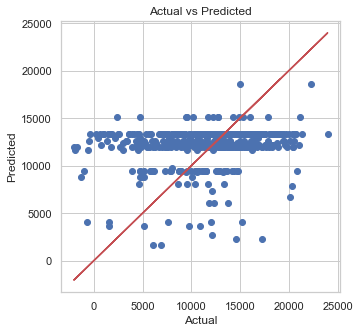

In [87]:
# Gfit actual vs expected
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()


### 5.6. Support Vector Regressor

In [102]:
from sklearn.svm import SVR

In [103]:
# Instantiate support vector regression model
sv_reg = SVR(kernel='rbf', gamma='auto')

In [104]:
sv_reg.fit(x_train,y_train)

SVR(gamma='auto')

In [107]:
y_pred = sv_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  4870.073393979129


### 5.7.  Heterogeneous Ensembles  

In [108]:
# Instantiate a voting ensemble usinG sklearn's VotingRegressor class
from sklearn.ensemble import VotingRegressor

In [111]:
# Define the models which we'll include in our ensemble. 
# We pass a list of tuples, which each have a string identifier for the
# model (arbitrary choice), along the actual instantiated sklearn model.  
models = [("rf",forest_3),("DT",DT),("SVR",sv_reg)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.1,0.3,0.6])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

At this point, we have built a voting-based ensemble that combines:

10% of Random Forest output
30% of Decision Tree output
60% of Support Vector Regression output

In [113]:
#making the final prediction
v_reg.fit(x_train,y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=5,
                                                   random_state=23)),
                            ('DT', DecisionTreeRegressor(max_depth=5)),
                            ('SVR', SVR(gamma='auto'))],
                weights=array([0.1, 0.3, 0.6]))

In [114]:
#Let's check the performance of the voting ensemble.
y_pred = v_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE:  4743.728732657775


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

We were able to fit 4 different models to our data. We will evaluate each models peformance using the Root Mean Square Error (RMSE). This is a measure of how the avarage error for each model. Below is a table that summarizes aech model.



| Model | RSME |
|:--- |:--- |
 |1. Linear Least Squares Regression | |
 |2. Ridge Regression | |
 |3. Random Forest | |
 |4. Decision Trees | |
 |5. Support Vector Regressor  | |
 |6. Heterogeneous Ensembles | |

In [113]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [114]:
# discuss chosen methods logic